<a href="https://colab.research.google.com/github/esoulard47/DataAnalyse_BankMarketing/blob/main/Miniprojet_MscAIB_Bank_Marketing_Emmanuelle_Soulard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <div style="display: flex; background-color: RGB(255,114,0);" >
<h3 style="margin: auto; padding: 30px; ">PRISE DE DECISION BASEE SUR LES DONNES : PROJET BANK MARKETING EMMANUELLE SOULARD
</h3>
</div>

En suivant le cadre méthodologique **CRISP-DM**, nous explorerons chaque étape du processus de modélisation :
- **Compréhension du business**
- **Compréhension des données**
- **Préparation des données**
- **Modélisation**
- **Évaluation des modèles**
- **Déploiement des résultats**

## Compréhension du Business
- **principe du compte à terme**
Placement non liquide, a durée déterminée (4 ans, en moyenne), dont le taux est fixé par la banque. C'est donc un placement sans risque, avec un rendement connu à l'avance
- **Outils marketing de la banque**
L'opération est conçue pour concerner le fichier client existant, donc la banque a déjà les coordonnées des personnes, et une base de confiance qui permet une avancée commerciale. De plus, chaque client est associé à un conseiller bancaire
- **détail de la banque**
C'est une banque portugaise, qui a récolté des données entre 2008 et 2013. A noter que cette date peut avoir une importance, dans le sens où elle démarre au moment de la crise des subprimes.

## OBJECTIFS
- **Objectif principal** : décider quels clients cibler pour souscrire à des dépôts à terme.
- **Objectifs secondaires** :
    - Explorer et analyser les données pour extraire des insights stratégiques.
    -Appliquer des méthodes statistiques avancées pour valider les résultats.
    -Fournir des recommandations stratégiques basées sur les résultats obtenus.

## Compréhension des données
- **détail de la collecte**
Les données ont été récupérées par une prospection directe par téléphone. Souvent plus d'un contact téléphonique a été nécessaire pour obtenir l'adhésion, ou non, au compte à termes
- **détail des fichiers**
   - bank-full.csv comporte l'intégralité des données.
   - bank.csv comporte 10% des données sélectionnées de façon aléatoire et créé pour l'élaboration des modèles de machine learning
   - bank-additional-full.csv correspond à bank-full, enrichi de 5 caractéristiques caractéristiques sociales et économiques supplémentaires, supposées améliorer le modèle
   - bank-additional.csv comporte 10% des données sélectionnées de façon aléatoire à partir du fichier bank-additional-full.csv et créé pour l'élaboration des modèles de machine learning.
- **détail des données**
Il va être examiné lors du début de l'analyse (voir plus bas)

##**VU CES INFORMATIONS, JE DECIDE DE TRAVAILLER AVEC LE FICHIER bank-additional, QUI COMPORTE LES DONNEES LES PLUS COMPLETES ET QUI COMPORTE DEJA LES DONNEES DES AUTRES FICHIERS**

## La variable explicative est **y**, car c'est ce résultat que l'on veut maximiser. L'objectif de ce travail va donc d'être de trouver les autres variables contenues dans ces données qui influencent cette variable vers le "Oui"


## Exploration préliminaire des données

In [ ]:
import pandas as pd

df = pd.read_csv(r"bank-additional-full.csv")

print(df.shape)
#Ici, le résultat montre 41188 lignes, mais une seule colonne. Ce qui est bloquant pour l'analyse.

(41188, 1)


In [ ]:
df.describe()
# la fonction "shape" n'a détecté que la première colonne. En fait, le df comporte bien 21 colonnes
# Mais il semblerait qu'on ait un problème de forme

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
count,41188
unique,41176
top,"27;""technician"";""single"";""professional.course""..."
freq,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                        Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                        --------------  ----- 
 0   age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"  41188 non-null  object
dtypes: object(1)
memory usage: 321.9+ KB


In [ ]:
import pandas as pd
# Je regarde si c'est un problème de séparateur
df = pd.read_csv('bank-additional-full.csv', sep=';', encoding='utf-8')

print(df.shape)

print(df.info())
# C'est effectivement un souci de séparateur dans le csv. Le fichier a bien 21 colonnes, 41188 entrées.
# 5 colonnes numériques à virgules, 5 colonnes numériques entières et 11 objets


(41188, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   411

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Il y a peu de colonnes numériques, et y est binaire, je ne vais donc pas faire une analyse de distribution directe.

Ni une analyse de correlation immédiatement.

Il va falloir encoder les données et analyser les impacts de chaque catégorie de variable sur y

## ANALYSE PRELIMINAIRE DE LA VARIABLE 'y'

In [ ]:
# Vérifier les valeurs nulles dans la colonne y
null_count = df['y'].isnull().sum()

if null_count > 0:
    print(f"La colonne 'y' contient {null_count} valeurs nulles.")
else:
    print("Aucune valeur nulle trouvée dans la colonne 'y'.")

    # Afficher les valeurs uniques dans la colonne y
print("Valeurs uniques dans la colonne 'y' :", df['y'].unique())



Aucune valeur nulle trouvée dans la colonne 'y'.
Valeurs uniques dans la colonne 'y' : ['no' 'yes']


# Pas de valeur nulle pour y, et que des 'no' ou 'yes', je peux donc travailler sur le quantitatif de ces données

Valeurs uniques dans 'y': ['no' 'yes']


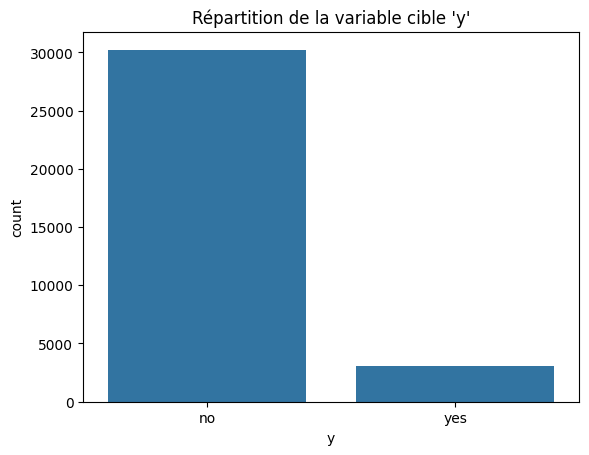

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vérifions d'abord que la colonne 'y' existe et imprimons ses valeurs uniques
if 'y' in df.columns:
    print("Valeurs uniques dans 'y':", df['y'].unique())

    # Répartition de la cible
    sns.countplot(x='y', data=df)
    plt.title("Répartition de la variable cible 'y'")
    plt.show()
else:
    print("La colonne 'y' n'existe pas dans le DataFrame. Vérifie son orthographe ou son existence.")

## La proportion de "yes" est très faible par rapport à la proportion de "no".
Comme je n'ai pas de valeurs manquantes, je peux calculer avec précision de quelle proportion il s'agit :

In [ ]:
# Comptage des valeurs dans la colonne 'y'
counts = df['y'].value_counts()

# Extraction des valeurs et création de variables pour les calculs
non_count = counts['no']
yes_count = counts['yes']

# Calcul du ratio "no" par rapport à "yes"
ratio = non_count / yes_count

# Affichage des résultats
print(f"Nombre de 'non' : {non_count}")
print(f"Nombre de 'oui' : {yes_count}")
print(f"Ratio 'non' / 'oui' : {ratio:.2f}")

Nombre de 'non' : 36548
Nombre de 'oui' : 4640
Ratio 'non' / 'oui' : 7.88


## Premier résultat : la campagne a obtenu 7,88% de "oui" pour la souscription du compte à termes

Maintenant, il faut essayer d'avoir une idée de quelles variables ont le plus de "oui". Puis, nous nous baserons sur cette analyse pour restreindre les variables utilisées dans le modèle final.

Ce taux de 7,88 est la valeur de référence qui sera utilisée dans les prochaines campagnes pour tester la validité du modèle sur le terrain. C'est donc une donnée importante

L'objectif est de faire croitre cette donnée.

Ce niveau est assez courant dans les campagnes marketing, en particulier sur des populations de clients naifs. Toutefois, pour la modélisation des données, il peut être impactant car le pourcentage de 'oui' est sous représentatif. Donc, il est très probable que nous ayons à travailler sur des sous-échantillons de la base de donnée pour créer la modélisation.


In [ ]:
# Vérification des valeurs nulles dans tous le dataframe
null_summary = df.isnull().sum()
print(null_summary[null_summary > 0])

Series([], dtype: int64)


Aucune valeur considérée comme nulle dans le dataframe à ce stade, toutefois, il y a des valeurs de type 'unknow' qu'il va falloir traiter

## ANALYSE DES VARIABLES NUMERIQUES

In [ ]:
# Sélectionner uniquement les colonnes numériques
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_data = df[numeric_columns]  # Sous-ensemble du DataFrame avec les colonnes numériques

# Calcul des statistiques descriptives et création d'un dataframe
stats = numeric_data.describe().T  # Je transpose pour une meilleure lisibilité
stats['IQR'] = stats['75%'] - stats['25%']  # Calcul de l'IQR

# Ajouter les médianes
stats['Mediane'] = numeric_data.median()

# Réorganiser les colonnes pour inclure toutes les métriques
stats = stats[['mean', 'std', '50%', '25%', '75%', 'IQR']]
stats.rename(columns={'mean': 'Moyenne', 'std': 'Ecart-Type', '50%': 'Mediane', '25%': 'Q1', '75%': 'Q3'}, inplace=True)

# Afficher les statistiques directement
print(stats)


                    Moyenne  Ecart-Type   Mediane        Q1        Q3      IQR
age               39.860871   10.289488    38.000    32.000    47.000   15.000
duration         258.207583  259.792638   180.000   102.000   319.000  217.000
campaign           2.566662    2.767473     2.000     1.000     3.000    2.000
pdays            963.531651  184.295254   999.000   999.000   999.000    0.000
previous           0.170009    0.487169     0.000     0.000     0.000    0.000
emp.var.rate       0.082861    1.565945     1.100    -1.800     1.400    3.200
cons.price.idx    93.570313    0.576367    93.444    93.075    93.994    0.919
cons.conf.idx    -40.541164    4.623200   -41.800   -42.700   -36.400    6.300
euribor3m          3.623298    1.730226     4.857     1.344     4.961    3.617
nr.employed     5167.432566   71.760333  5191.000  5099.100  5228.100  129.000
y_binary           0.111335    0.314550     0.000     0.000     0.000    0.000


Affichage graphique de ces données :

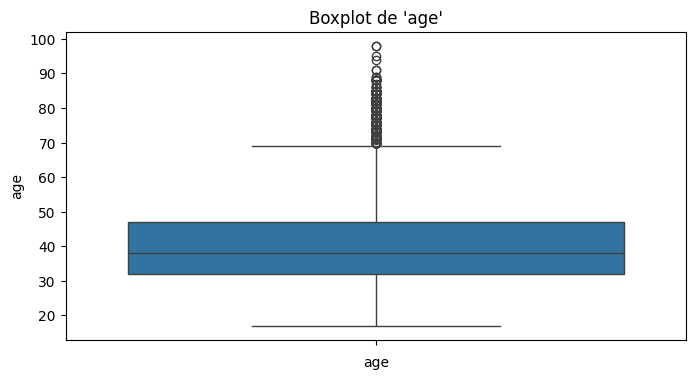

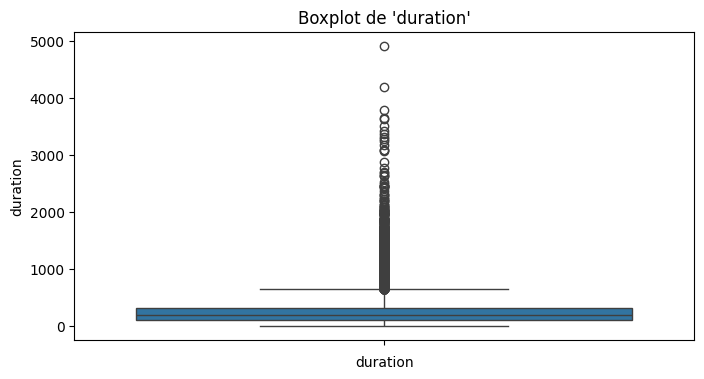

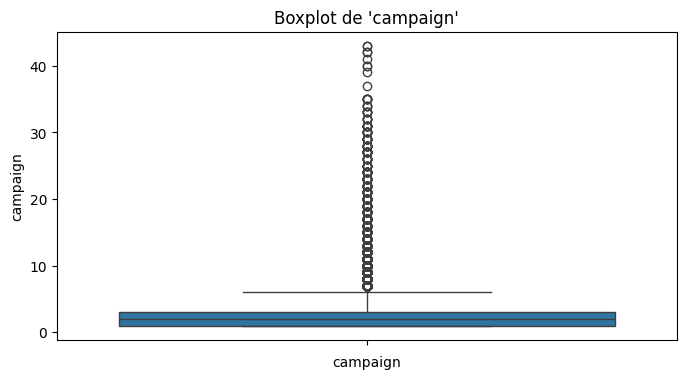

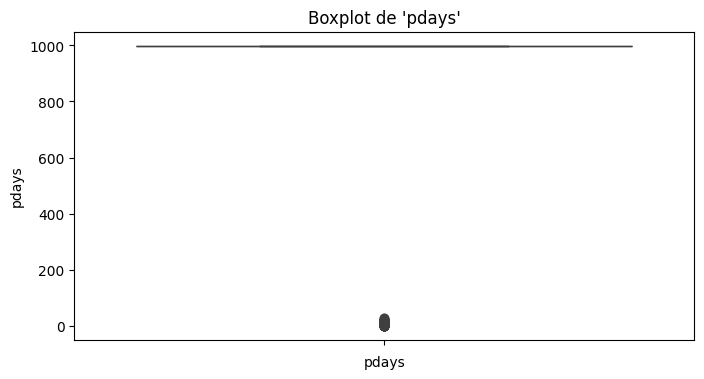

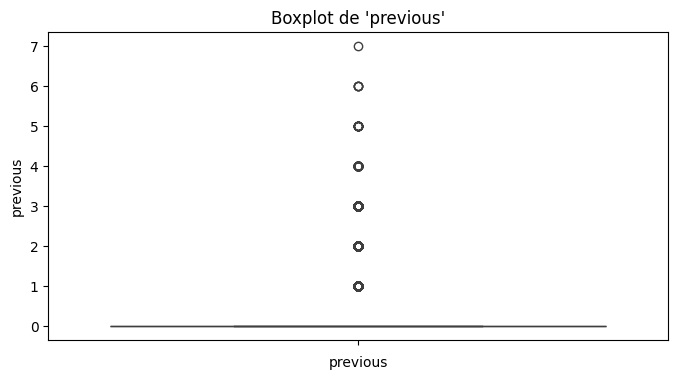

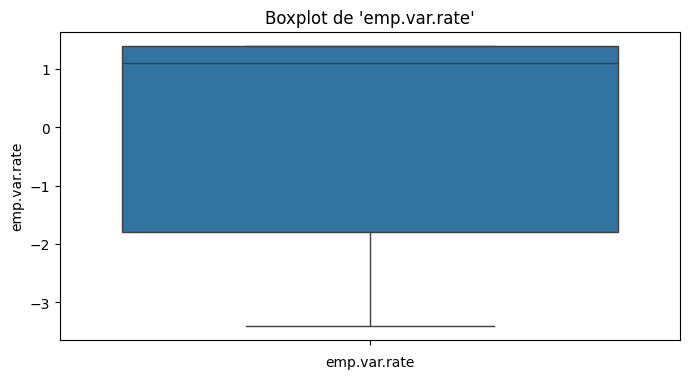

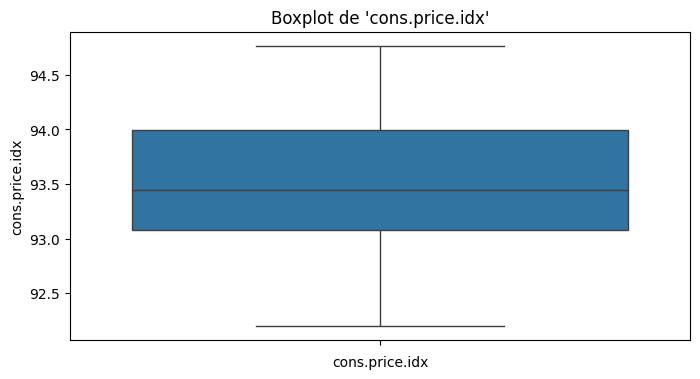

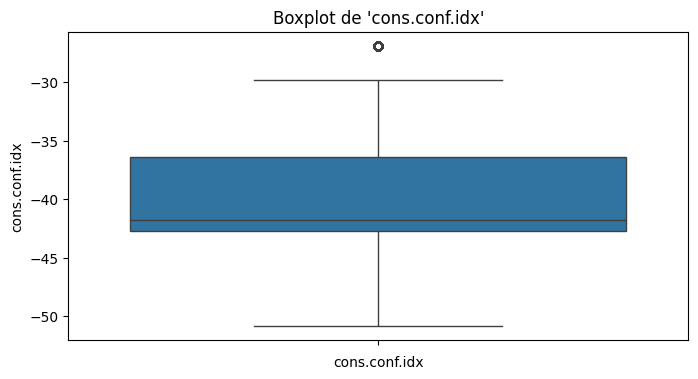

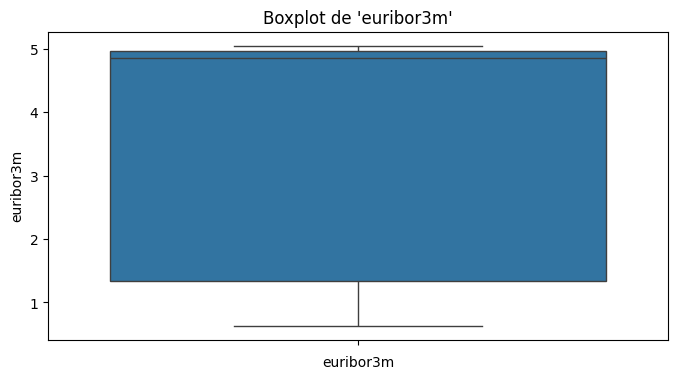

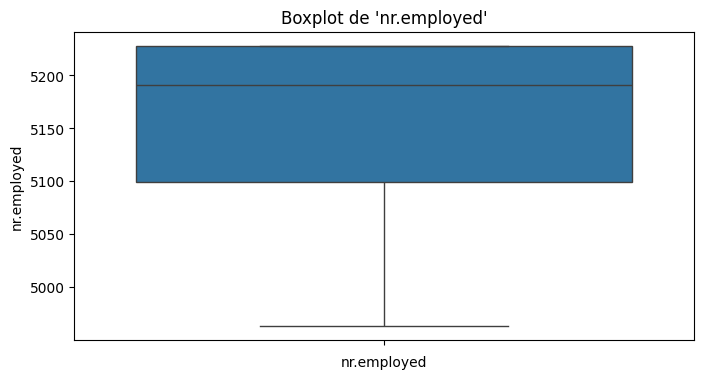

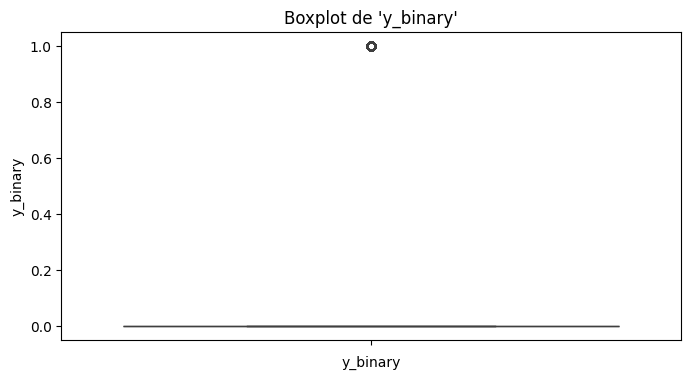

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tracer les boxplots individuellement pour chaque colonne numérique
for col in numeric_data.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=numeric_data[col])
    plt.title(f"Boxplot de '{col}'")
    plt.xlabel(col)
    plt.show()


Les variables 'age', 'campaign', 'duration', 'pdays' et 'previous' semblent montrer des distributions fortement impactées par des outliers, ou non normales. Il faut décider de l'exclusion de ces outliers ou non, avant de poursuivre l'analyse. Dans le cas de 'age', si la population est majoritairement âgée, la représentation graphique est logique.

Les indices et données externes'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m'et 'nr.employed' semblent avoir des distributions normales. Je décide donc de poursuivre l'analyse sur ces variables.

Pour les variables age, campaign, duration, pdays et previous, une analyse approfondie des outliers est nécessaire. Je vais utiliser la règle des 1,5 x IQR pour détecter les outliers et évaluer leur impact sur les statistiques descriptives. Si les outliers représentent des cas extrêmes mais réalistes (comme des clients très âgés), ils seront conservés. Sinon, ils seront soit supprimés, soit traités par transformation. Les variables normales (emp.var.rate, etc.) seront directement analysées pour leurs relations avec la variable cible y

<Axes: ylabel='Density'>

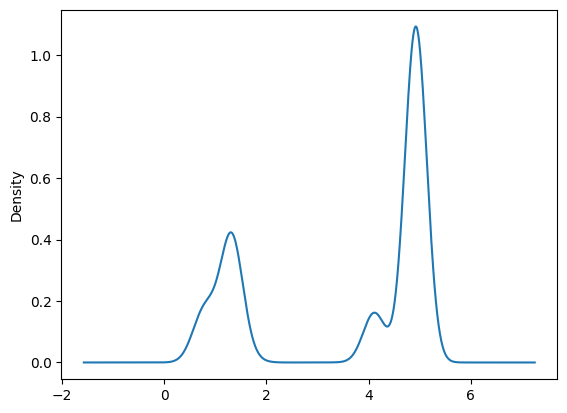

In [ ]:
df.euribor3m.plot(kind='density')

Nous avons clairement plusieurs sous-ensemble de données pour les taux interbancaires à 3 mois.
Il est fort possible que chacun de ces pics représentent une valeur de taux.
Comme chacun des taux n'est pas représenté de valeur identique, on peut interpréter cette figure de la façon suivante :
Les taux interbancaires à 3 mois ont été beaucoup proposé autour de la valeur de 5%, un peu moins proposés à une valeur inférieure à 2% et un peu moins proposé à une valeur de 4%.

L'étude ayant duré plusieurs années, il est logique que les taux à 3 mois aient présenté plusieurs valeurs autours desquelles les données fluctuent.

<Axes: ylabel='Density'>

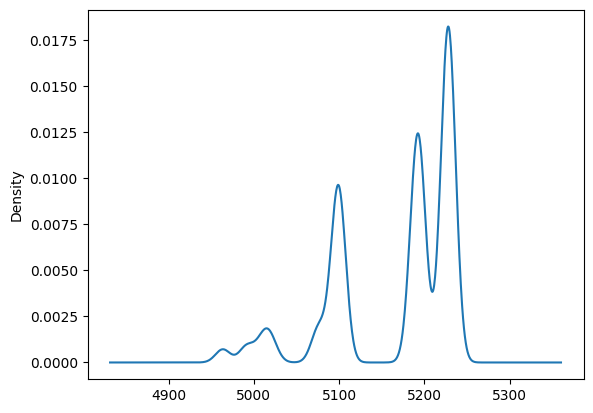

In [ ]:
df['nr.employed'].plot(kind='density')

#Colonnes pour lesquelles les outliers sont un problème:
Duration, previous, pdays et campaign

Dans les autres cas, les boites à moustaches ne montrent pas d'outliers ou une quantité négligeable.

Je calcule les outliers par la méthode des 1,5 IQR et j'évalue leur incidence pour décider quoi en faire

In [ ]:
import pandas as pd

# Calcul des outliers avec la méthode IQR
outliers_iqr = {}
for col in numeric_data.columns:
    Q1 = numeric_data[col].quantile(0.25)
    Q3 = numeric_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = numeric_data[(numeric_data[col] < lower_bound) | (numeric_data[col] > upper_bound)]
    outliers_iqr[col] = len(outliers)

# Calcul de la proportion d'outliers (% des données)
total_rows = len(numeric_data)
outlier_weights = {col: (count / total_rows) * 100 for col, count in outliers_iqr.items()}

# Création d'un tableau pour mieux lire les résultats
outlier_df = pd.DataFrame({
    'Colonne': outliers_iqr.keys(),
    'Nombre d\'outliers': outliers_iqr.values(),
    'Proportion (%)': outlier_weights.values()
})

# Trier par proportion décroissante pour faciliter la lecture
outlier_df = outlier_df.sort_values(by='Proportion (%)', ascending=False)

# Afficher le tableau
print(outlier_df)

           Colonne  Nombre d'outliers  Proportion (%)
4         previous               5179       13.541639
10        y_binary               4258       11.133482
1         duration               2749        7.187868
2         campaign               2220        5.804680
3            pdays               1366        3.571709
0              age                412        1.077265
7    cons.conf.idx                409        1.069421
5     emp.var.rate                  0        0.000000
6   cons.price.idx                  0        0.000000
8        euribor3m                  0        0.000000
9      nr.employed                  0        0.000000


#Détection, évaluation et traitement des outliers

**y-binary** : variable étudiée, à ne pas modifier, evidemment

**duration** : la durée de l'appel. Il est énoncé dans le fichier d'information bank-additional-name.txt qu'il ne faut pas l'inclure dans le data set pour la création du modèle prédictif, donc on va carrément exclure la colonne.

**campaign et previous** : Les valeurs extrêmes signalent les campagnes intenses ou à long terme pour les prospects. On sait que les comportements d'achat sont en général influencés par la durée de la relation commerciale, et le nombre de campagnes. Je me positionne dans la création d'un modèle prédictif pour UNE SEULE CAMPAGNE, donc je décide d'exclure leurs outliers

**pdays** : A noter que les clients non contactés sont enregistrés sous la valeur 999, arbitraire, qui biaise donc une analyse quantitative de cette variable. Mais cette variable me semble importante pour le modèle. L'alternative serait d'exclure les clients à la valeur 999 et de créer une nouvelle colonne binaire : contacté/non contactés. Je décide d'explorer davantage le contenu de cette colonne.

In [ ]:
# Vérifier les valeurs uniques et leur fréquence
print("Valeurs uniques et leur fréquence dans 'pdays' :")
print(df['pdays'].value_counts())

# Vérifier si des valeurs autres que 999 existent
print("\nExiste-t-il des valeurs différentes de 999 ?")
print(df['pdays'].unique())

# Compter le nombre de valeurs égales ou différentes de 999
print("\nNombre de valeurs 999 et différentes de 999 :")
print(f"999 : {(df['pdays'] == 999).sum()} lignes")
print(f"Différentes de 999 : {(df['pdays'] != 999).sum()} lignes")

# Visualiser la distribution de 'pdays' si des valeurs autres que 999 existent
if (df['pdays'] != 999).any():
    print("\nStatistiques pour les valeurs différentes de 999 :")
    print(df[df['pdays'] != 999]['pdays'].describe())

Valeurs uniques et leur fréquence dans 'pdays' :
pdays
999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64

Existe-t-il des valeurs différentes de 999 ?
[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]

Nombre de valeurs 999 et différentes de 999 :
999 : 39673 lignes
Différentes de 999 : 1515 lignes

Statistiques pour les valeurs différentes de 999 :
count    1515.000000
mean        6.014521
std         3.824906
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        27.000000
Name: pdays, dtype: float64


Les valeurs de pdays différentes de 999, sont très peu nombreuses, au regard du volume du dataset (1515/41188*100 = 0.3%).

Cette colonne n'est donc pas logiquement pertinente pour le modèle prédictif, il suffit de noter qu'il doit être appliqué à des prospects naïfs.

#Je supprime donc pdays du dataset

In [ ]:
df_original = df.copy() #création d'une copie de sauvegarde

def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filtrer les données sans les outliers
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

# Supprimer les outliers des colonnes 'campaign' et 'previous' dans df
df = remove_outliers_iqr(df, 'campaign')
df = remove_outliers_iqr(df, 'previous')

# Supprimer la colonne 'duration' du dataset
if 'duration' in df.columns:
    df = df.drop(columns=['duration'])

# Supprimer la colonne 'pdays' du dataset
if 'pdays' in df.columns:
    df = df.drop(columns=['pdays'])

# Afficher les dimensions avant et après le nettoyage
print(f"Taille des données après exclusion des outliers et de la colonne duration : {df.shape}")

# Il nous reste 33262 lignes dans le dataframe, ce qui est largement suffisant pour créer le modèle


Taille des données après exclusion des outliers et de la colonne duration : (33262, 19)


In [ ]:
df.head() #Pour vérifier si l'exclusion a bien été effectuée

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#Analyse en PCA

Nous effectuons un test de réduction de dimension pour aller détecter les phénomènes sous-jacents influençant la variation de y à partir des variables étudiées

Variance expliquée par la première composante : 0.51
Variance expliquée par la deuxième composante : 0.16


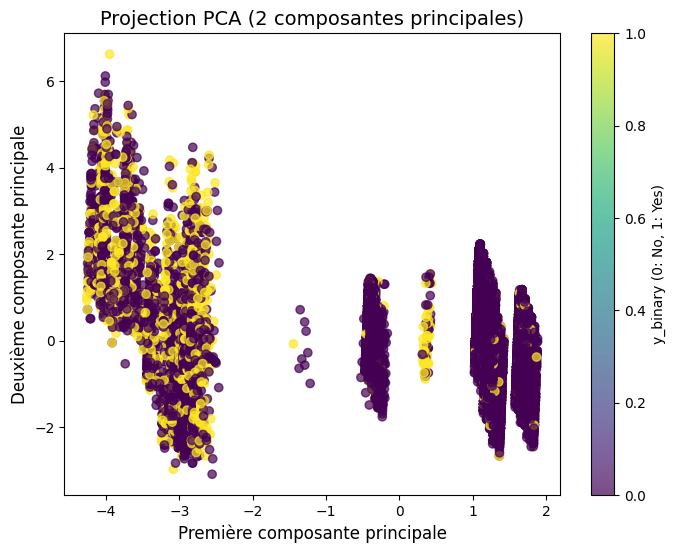

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Normaliser les données numériques avant la PCA
from sklearn.preprocessing import StandardScaler

# Sélection des variables numériques uniquement
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
X_numeric = df[numeric_cols]

# Standardisation des variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Recréer la colonne y_binary : 1 pour "yes", 0 pour "no"
if 'y' in df.columns:
    df['y_binary'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)
else:
    print("La colonne 'y' est absente. Vérifie le contenu du DataFrame.")

# PCA avec 2 composantes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualiser la variance expliquée
explained_variance = pca.explained_variance_ratio_
print(f"Variance expliquée par la première composante : {explained_variance[0]:.2f}")
print(f"Variance expliquée par la deuxième composante : {explained_variance[1]:.2f}")

# Tracer les résultats
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['y_binary'], cmap='viridis', alpha=0.7)
plt.colorbar(label='y_binary (0: No, 1: Yes)')
plt.title("Projection PCA (2 composantes principales)", fontsize=14)
plt.xlabel("Première composante principale", fontsize=12)
plt.ylabel("Deuxième composante principale", fontsize=12)
plt.show()


On a 46% de la variance expliquée par la première dimension, et 14% expliqué par la seconde.
Ces deux composantes expliquent environ 60% du modèle. ça me semble un peu léger, parce qu'on risque de passer à côté de variances fondamentales.

## Je projette les variables sur le graphique

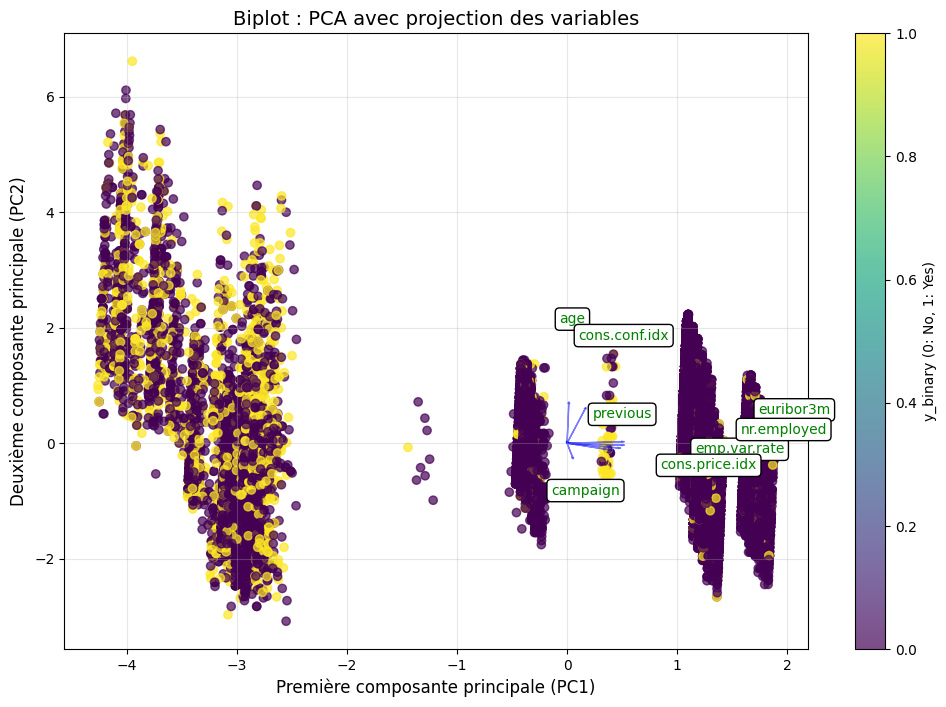

In [ ]:
plt.figure(figsize=(12, 8))

# Scatter plot des données projetées sur PC1 et PC2
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, c=df['y_binary'], cmap='viridis')
plt.colorbar(label='y_binary (0: No, 1: Yes)')

# Ajouter les vecteurs des variables
for i, (x, y) in enumerate(zip(loadings[0, :], loadings[1, :])):  # PC1, PC2
    plt.arrow(0, 0, x, y, color='blue', alpha=0.5, head_width=0.02, length_includes_head=True)

    # Position par défaut pour les labels
    label_x = x * 3
    label_y = y * 3

    # Décalage spécifique pour 'previous'
    if columns[i] == 'previous':
        label_x += 0.5  # Décale davantage sur l'axe X
        label_y += 0.5  # Décale davantage sur l'axe Y

    # Décalage spécifique pour 'euribor3m'
    if columns[i] == 'euribor3m':
        label_x += 0.5  # Décale davantage sur l'axe X
        label_y += 0.5  # Décale davantage sur l'axe Y
        # Décalage spécifique pour 'nr.employed'
    if columns[i] == 'nr.employed':
        label_x += 0.5  # Décale davantage sur l'axe X
        label_y += 0.5  # Décale davantage sur l'axe Y

    # Ajouter un texte avec un fond pour améliorer la lisibilité
    plt.text(label_x, label_y, columns[i], color='green', fontsize=10, ha='center', va='center',
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

plt.xlabel('Première composante principale (PC1)', fontsize=12)
plt.ylabel('Deuxième composante principale (PC2)', fontsize=12)
plt.title('Biplot : PCA avec projection des variables', fontsize=14)
plt.grid(alpha=0.3)
plt.show()



In [ ]:
# Trier les variables par contribution pour chaque composante
for col in loadings_df.columns:
    print(f"\nTop variables influençant {col}:")
    print(loadings_df[col].sort_values(ascending=False).head(5))



Top variables influençant PC1:
emp.var.rate      0.522265
euribor3m         0.521314
nr.employed       0.488936
cons.price.idx    0.428565
cons.conf.idx     0.171411
Name: PC1, dtype: float64

Top variables influençant PC2:
age              7.164385e-01
cons.conf.idx    6.211915e-01
euribor3m        2.563226e-02
previous        -1.665335e-16
emp.var.rate    -3.536056e-02
Name: PC2, dtype: float64


La composante PC1 semble principalement influencée positivement par euribor3m (les taux d'intérêt interbancaires à 3 mois), les données de la consommation des ménages (cons.conf.idx), le taux d'emploi (emp.var.rate). Donc les facteurs externes.

Par ailleurs, l'âge, le taux de confiance global des ménages (cons.conf.idx) et le fait que  la personne ait déjà été contactée semblent impacter le modèle principalement dans sa composante PC2. Donc, cette composante est principalement impactée par les facteurs internes.

Les facteurs internes (tels que l'âge et les interactions passées) peuvent être utilisés pour personnaliser les offres, tandis que les facteurs externes (comme les taux d'intérêt ou les indicateurs économiques) peuvent aider à anticiper les périodes propices à lancer des campagnes.

Euribor3m semble avoir des impacts dans les deux dimensions, il semble donc être un des indicateurs principaux à suivre.

#Il sera important dans le modèle de prendre en compte les facteurs externes comme internes car ils semblent influencer la prise de décision positive

## Analyse préliminaire des correlations :

In [ ]:
from scipy.stats import pointbiserialr

# Conversion de y en binaire
df['y_binary'] = (df['y'] == 'yes').astype(int)

# Liste des colonnes numériques
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calcul des corrélations point bisériales
correlations = {}
for col in numeric_columns:
    corr, _ = pointbiserialr(df['y_binary'], df[col])
    correlations[col] = corr

# Affichage des corrélations
correlations = pd.DataFrame(correlations.items(), columns=['Variable', 'Corrélation avec y'])
correlations = correlations.sort_values(by='Corrélation avec y', ascending=False)
print(correlations)

         Variable  Corrélation avec y
8        y_binary            1.000000
0             age            0.005556
5   cons.conf.idx           -0.013744
1        campaign           -0.033599
4  cons.price.idx           -0.156956
3    emp.var.rate           -0.258350
6       euribor3m           -0.258749
7     nr.employed           -0.279503
2        previous                 NaN


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:5535: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rpb, prob = pearsonr(x, y)


<ipython-input-28-2fde26acecb8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


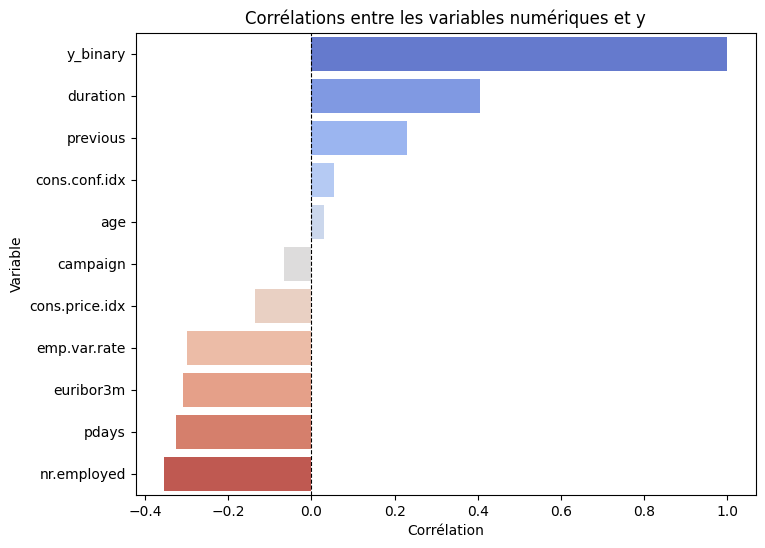

In [ ]:
# Visualiser les corrélations
plt.figure(figsize=(8, 6))
sns.barplot(
    x=correlation_df['Corrélation'],
    y=correlation_df.index,
    palette=sns.color_palette('coolwarm', n_colors=len(correlation_df))
)
plt.title("Corrélations entre les variables numériques et y")
plt.xlabel("Corrélation")
plt.ylabel("Variable")
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)  # Ligne pour indiquer zéro
plt.show()


#Voici les correlations qui semblent apparaitre de l'analyse des colonnes déjà encodées numériquement :

**previous** : correlation positive, très certainement en raison de la durée et l'intensité du processus commercial. Ce qui est logique, on sait que plus une personne est exposée à une offre, plus elle a de chance d'acheter.

**emp.var.rate** : employement variation rate : La variation du taux de chomage semble montrer une correlation négative, ce qui est logique : si les gens sont au chômage, il vont peu investir dans un placement qui bloque leur argent pour 4 ans

**euribor3m** : Euro Interbank Offered Rate 3 month : c'est l'indice interbancaire des taux de rémunération des placements. Ce sont les taux de placement variables, et ils impactent directement la nature du produit proposé. Le fait que cet impact soit négatif pourrait prouver qu'en cas de taux élevé, les clients se reportent peut-être sur des produits à plus courts termes, rentables plus vite, qu'un CAT bloqué pour 4 ans


**nr.employed** : moyenne trimestrielle du nombre total de citoyens actifs.Très comparable à la variable emp.var.rate, et qui est en corrélation dans le même ordre de grandeur, et pour le même type de variation (négative), pour la même raison

# Ces correlations sont a confirmer par le modèle prédictif. A noter que les variables nr.employed et emp.var.rate analysent très probablement le même phénomène. Il me semble assez logique que le modèle puisse utiliser une seule de ces variables, et celle qui semblent montrer la plus grosse correlation. Donc, nr.employed. (possibilités : soit conservation soit suppression des variables dans la suite de la création du modèle, ou faire les deux successivement pour comparer les deux modèles).

## ANALYSE DES VARIABLES CATEGORIELLES

In [ ]:
# Liste des colonnes catégoriques
categorical_columns = ['job', 'marital', 'education', 'default', 'housing',
                       'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Affichage des valeurs uniques pour chaque colonne catégorique
for col in categorical_columns:
    print(f"\nValeurs uniques dans '{col}':")
    print(df[col].value_counts())



Valeurs uniques dans 'job':
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

Valeurs uniques dans 'marital':
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

Valeurs uniques dans 'education':
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

Valeurs uniques dans 'default':
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

Valeurs uniques dans 'housing':
housing
yes        21576
no         18622
unknown      990
Name: count, 

# Nous avons des valeurs 'unknow' dans chaque colonne. Il faut mesurer leur proportion, pour décider si leur impact peut être négligeable ou non.

Je mesure donc la proportion de oui et de non pour ces variables unknow et je la compare à la proportion initiale de y dans tout le dataframe. Si elles sont identiques, alors quelque soit le volume de 'unknow', il n'impacte pas l'analyse.

Si, par contre, cette proportion est très différente des 7,8% de départ, alors il faut décider si la colonne 'unknow' doit être considérée comme une catégorie de variable, ou si elle doit être supprimée car n'apportant pas d'information supplémentaire. Cette décision dépendra de la proportion de 'unknow' par rapport aux autres catégories de la colonne


In [ ]:
# Liste des colonnes catégoriques à analyser
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan']

# Initialisation d'une liste pour stocker les résultats
unknown_summary = []

# Parcourir chaque colonne
for col in categorical_columns:
    # Vérifie si 'unknown' existe dans la colonne
    if 'unknown' in df[col].unique():
        # Total des lignes dans la colonne
        total_count = len(df)

        # Nombre de 'unknown' dans la colonne
        unknown_count = df[df[col] == 'unknown'].shape[0]

        # Proportion des 'unknown' par rapport au total
        unknown_proportion = (unknown_count / total_count) * 100

        # Proportion de y = 'yes' parmi les 'unknown'
        yes_count_in_unknown = df[(df[col] == 'unknown') & (df['y'] == 'yes')].shape[0]
        yes_proportion_in_unknown = (yes_count_in_unknown / unknown_count) * 100

        # Ajouter les résultats dans la liste
        unknown_summary.append({
            'Variable': col,
            'Nombre Unknown': unknown_count,
            'Proportion Unknown (%)': unknown_proportion,
            'Proportion Oui (%) dans Unknown': yes_proportion_in_unknown
        })

# Convertir les résultats en DataFrame
unknown_summary_df = pd.DataFrame(unknown_summary)

# Trier par proportion de 'unknown' décroissante
unknown_summary_df = unknown_summary_df.sort_values(by='Proportion Unknown (%)', ascending=False)

# Afficher le tableau
from IPython.display import display
display(unknown_summary_df)



,Variable,Nombre Unknown,Proportion Unknown (%),Proportion Oui (%) dans Unknown
3,default,8597,20.872584,5.152960
2,education,1731,4.202680,14.500289
4,housing,990,2.403613,10.808081
5,loan,990,2.403613,10.808081
0,job,330,0.801204,11.212121
1,marital,80,0.194231,15.000000


## La proportion d'inconnus dans la colonne 'crédit en défaut' est très élevée (plus de 20%).
Le taux d'achat de 'y' des 'unknow' est comparable à celui du global. Je pense qu'il ne faut pas supprimer cette colonne, ni la fusionner avec 'no'.
Un crédit en défaut signale des soucis de trésorerie qui pourraient indiquer une potentialité d'achat moindre. Mais on ne constate pas ça dans les données.
Il est tout à fait possible de proposer un produit bancaire à un client, sans savoir s'il a un crédit en cours dans une autre banque.

## Les autres proportions de 'unkwnow' sont inférieures à 5%.
Je décide donc de retirer ces données inconnues de l'analyse, même si leur taux de "oui" est plus important que le global, parce qu'elles sont en proportion négligeables.

In [ ]:
# Liste des colonnes à nettoyer
columns_to_clean = ['education', 'housing', 'loan', 'job', 'marital']

# Supprimer les lignes contenant 'unknown' dans les colonnes spécifiées
df = df.copy()
for col in columns_to_clean:
    df = df[df[col] != 'unknown']

# Afficher la taille des données après nettoyage
print(f"Nombre de lignes après suppression : {df.shape[0]}")
print(f"Colonnes affectées : {columns_to_clean}")



Nombre de lignes après suppression : 30937
Colonnes affectées : ['education', 'housing', 'loan', 'job', 'marital']


# Il nous reste 30937 lignes aprés nettoyage, ce qui est largement suffisant pour créer notre modèle

# Je démarre donc l'analyse graphique des colonnes catégorielles et leur relation avec 'y'

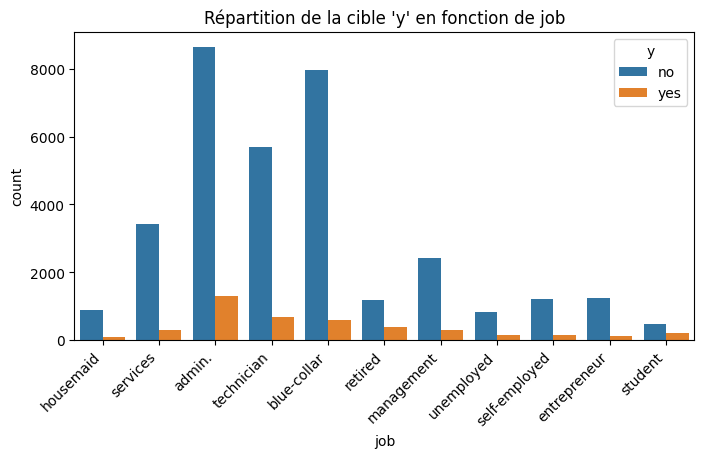

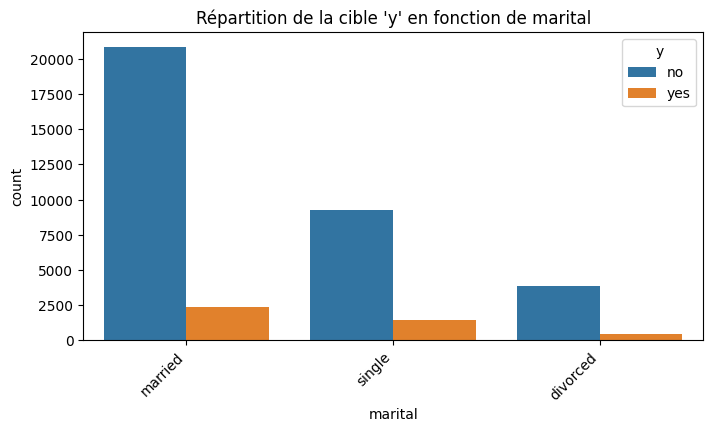

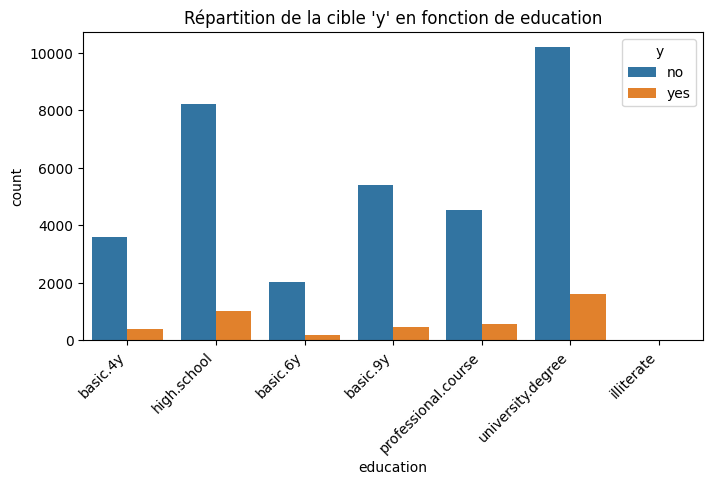

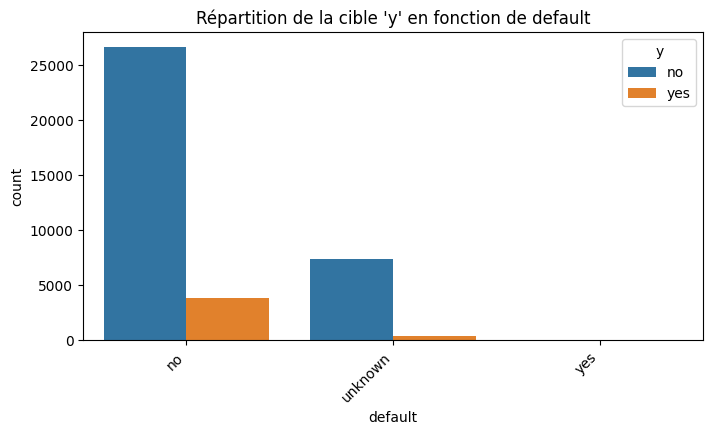

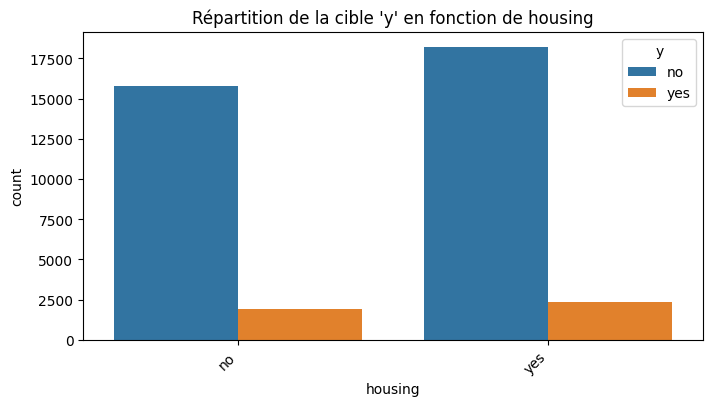

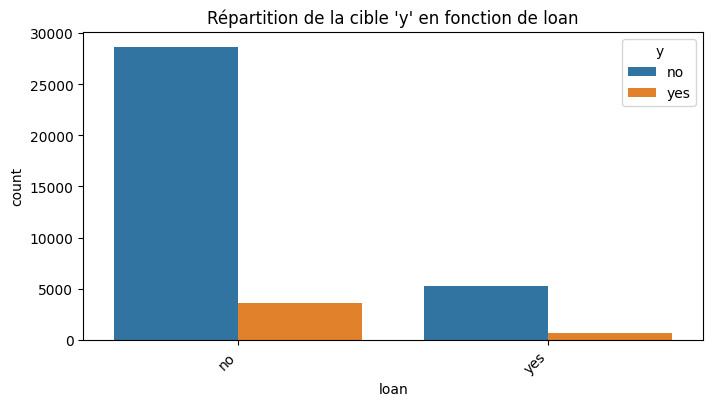

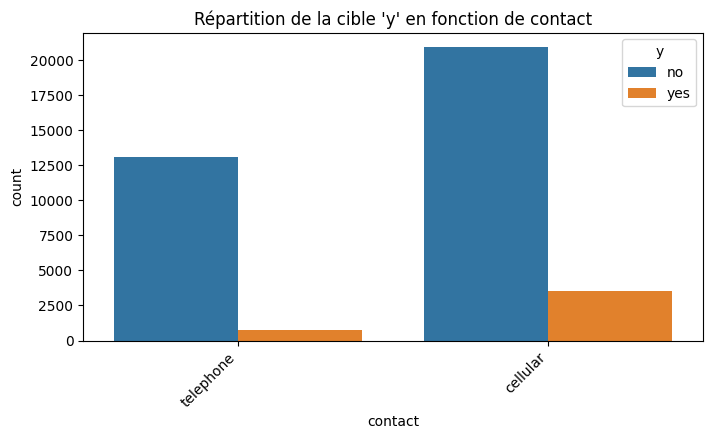

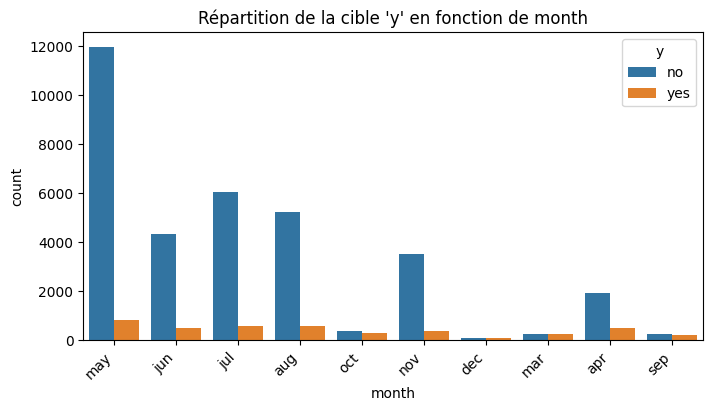

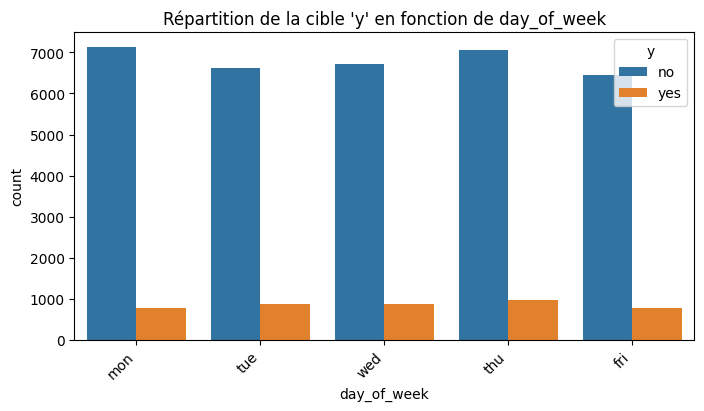

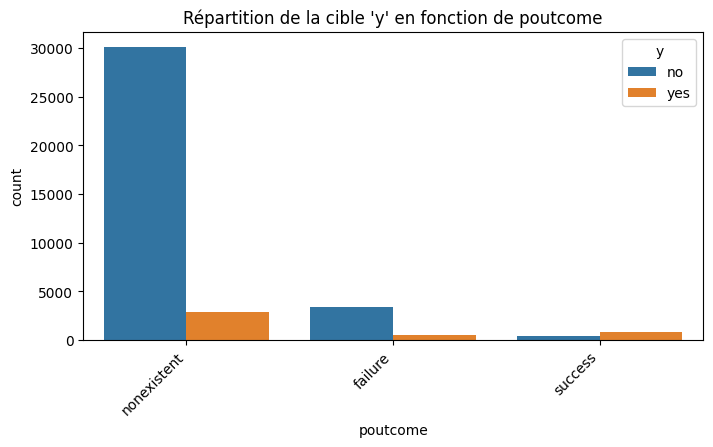

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Je cherche les catégories qui ont le plus de y = "oui"

# Liste des colonnes catégoriques
categorical_columns = ['job', 'marital', 'education', 'default', 'housing',
                       'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Afficher un graphique pour chaque variable
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue='y', data=df)
    plt.title(f"Répartition de la cible 'y' en fonction de {col}")
    plt.xticks(rotation=45, ha='right')  # Incline les étiquettes pour plus de lisibilité
    plt.show()

# ANALYSE RAPIDE DES GRAPHIQUES : effectifs et poids des catégories

**job** : les effectifs ne sont pas uniformes, et les principales catégories contactées sont admin, blue collar, technician, puis management et services

**marital** : effectif non uniforme également, la majorité des personnes contactées sont mariés

**education** : idem, la plupart des personnes contactés ont validés un diplôme d'études supérieures

**defaut** : on voit que les personnes qui sont en défaut de paiement de crédit ne sont pas contactées, ce qui est logique. les inconnus sont conservés, et leur effectif est très minoritaire par rapport aux personnes qui ne sont pas en défaut de paiement de leur crédit. C'est un critère important de restriction de la population de prospection.

**housing** : effectif assez similaire et comparable, et à première vue, pas d'incidance flagrante sur le taux de oui. A objectiver par le calcul

**Loan** : effectif très majoritaire sur les personnes qui n'ont pas de crédit personnel. A voir l'incidence sur le taux de souscription du produit

**cellular** : la majorité des personnes sont contactées via leur mobile. Cette donnée est pertinente, mais elle demande un réel enrichissement, qu'il est possible de peut-être déduire les horaires de contact. En effet, si les personnes sont contactées sur leur fixe dans la journée, il est fort probable que ce soient majoritairement des inactifs ou des retraités, qui sont des strates qui n'ont pas le même comportement d'achat que les actifs. De même, le contact outbound ou inbound (entrant ou sortant) ne donne pas non plus le même résultat sur les mobiles et les fixes. Bref, cette donnée n'est pas directement exploitable, à mon sens, et elle est partiellement redondante sur les classe socio-démocratiques. A voir ce que le modèle en dit.

**month** : tous les mois ne sont pas présents, et là également, nous manquons d'un enrichissement nécessaire : est-ce que les campagnes étaient permanentes ? Est-ce que les mois manquants correspondent aux mois sans prospections ?

**day of the week** : pas de variation d'effectif, et pas de variation à priori sur le taux d'acceptation du produit. A voir si le modèle en juge de même.

**poutcome** : très nette majorité de prospection sur des contacts froids. Comme le volume des contacts influence directement le taux d'acceptation, nous pouvons voir déjà que la campagne est une campagne de réchauffage des contacts, plus que de réelle vente. Par contre, nous voyons déjà distinctement que le taux d'acceptation du produit est nettement plus grand pour les contacts chaud, ayant déjà été exposé à la prospection. Possible de conclure qu'il faut créer des campagnes de contacts multiples pour maximimiser les ventes, programmer automatiquement plusieurs rappels des prospects. La proportion de "oui" pour le taux de failure est importante à regarder.

# Avoir les données, c'est bien. Avoir des ratios, c'est mieux pour comparer. Je créé donc un tableau de chiffres

In [ ]:
# Assurer que y est encodé en binaire
if 'y_binary' not in df.columns:
    df['y_binary'] = (df['y'] == 'yes').astype(int)

# Liste des colonnes catégoriques
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                       'contact', 'month', 'day_of_week', 'poutcome']

# Initialisation d'une liste pour stocker les résultats
category_rates = []

# Calcul du taux de 'yes' et écart-type pour chaque catégorie dans chaque colonne
for col in categorical_columns:
    # Vérifie si la colonne existe dans le DataFrame
    if col in df.columns:
        stats = df.groupby(col)['y_binary'].agg(['mean', 'std'])  # Moyenne et écart-type
        for category, row in stats.iterrows():
            category_rates.append({
                'Variable': col,
                'Catégorie': category,
                'Taux de Yes (%)': row['mean'] * 100,
                'Écart-Type': row['std']
            })

# Convertir en DataFrame
category_rates_df = pd.DataFrame(category_rates)

# Trier le tableau pour un affichage structuré
category_rates_df = category_rates_df.sort_values(by=['Variable', 'Taux de Yes (%)'], ascending=[True, False])

# Afficher le tableau
from IPython.display import display
display(category_rates_df)



,Variable,Catégorie,Taux de Yes (%),Écart-Type
33,contact,cellular,12.106648,0.326213
34,contact,telephone,4.779194,0.213334
47,day_of_week,thu,9.923222,0.298995
49,day_of_week,wed,9.453337,0.292591
48,day_of_week,tue,9.183210,0.288811
45,day_of_week,fri,8.967742,0.285742
46,day_of_week,mon,8.143557,0.273523
24,default,no,10.340689,0.304495
25,default,unknown,4.939435,0.216705
26,default,yes,0.000000,0.000000


# ANALYSE GRAPHIQUE DE CES DONNEES

<ipython-input-9-4702253a1def>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


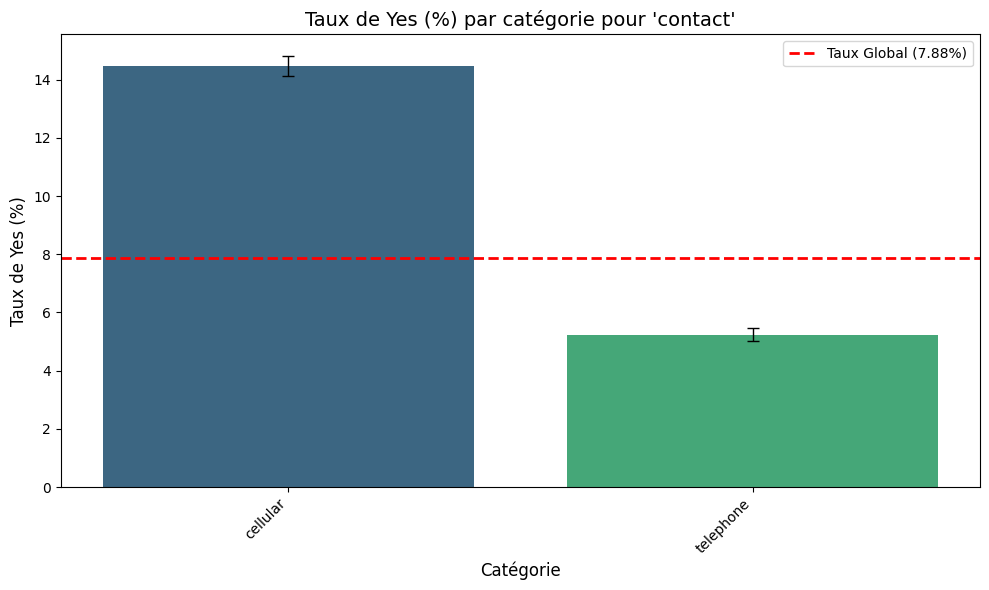

<ipython-input-9-4702253a1def>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


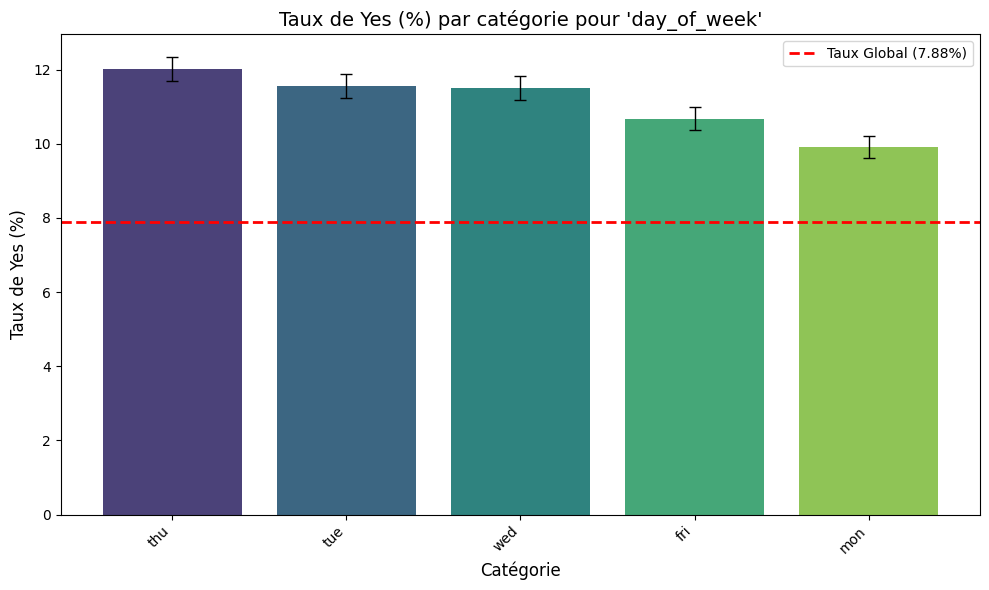

<ipython-input-9-4702253a1def>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


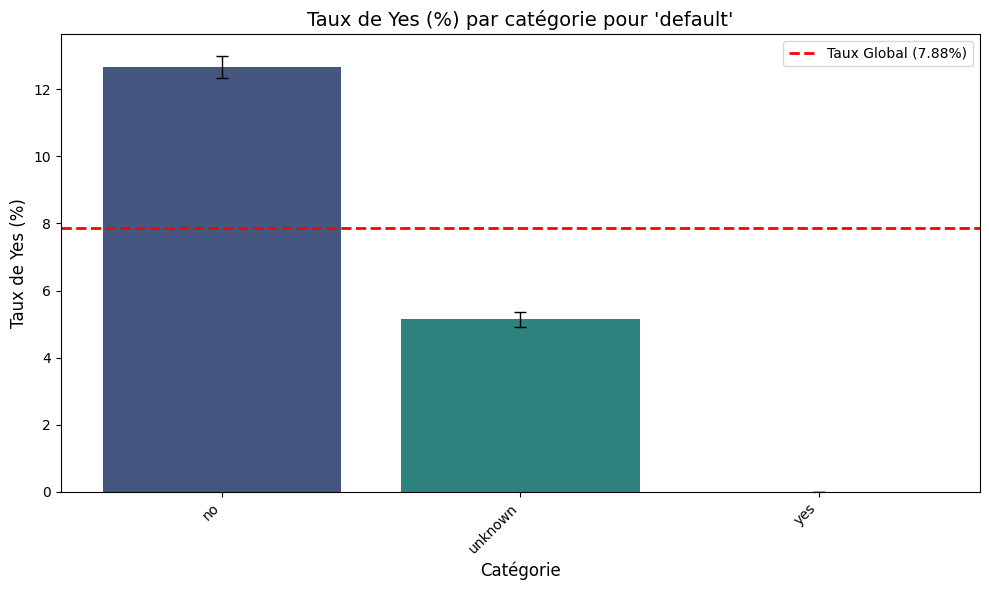

<ipython-input-9-4702253a1def>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


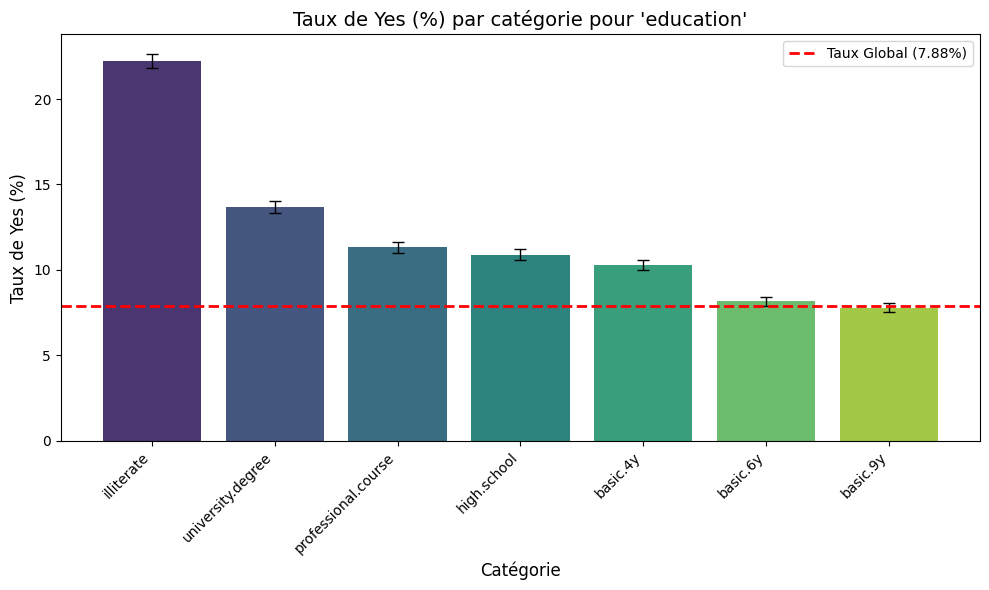

<ipython-input-9-4702253a1def>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


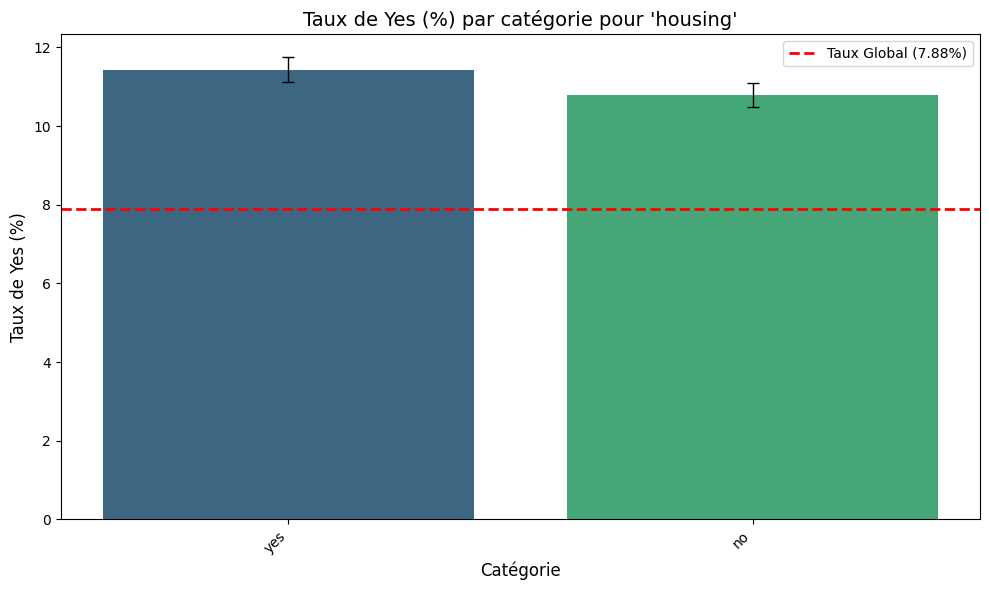

<ipython-input-9-4702253a1def>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


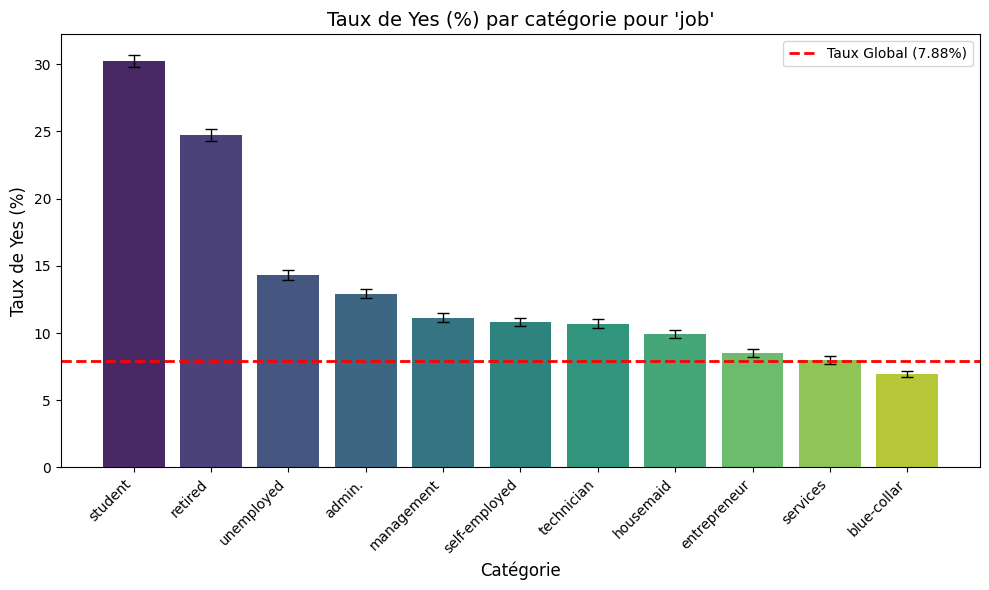

<ipython-input-9-4702253a1def>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


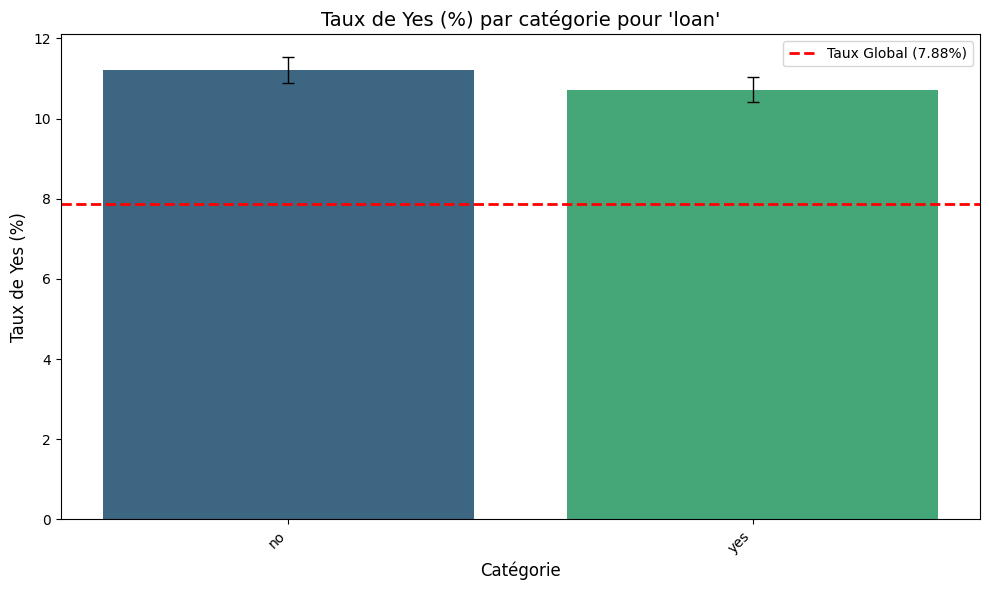

<ipython-input-9-4702253a1def>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


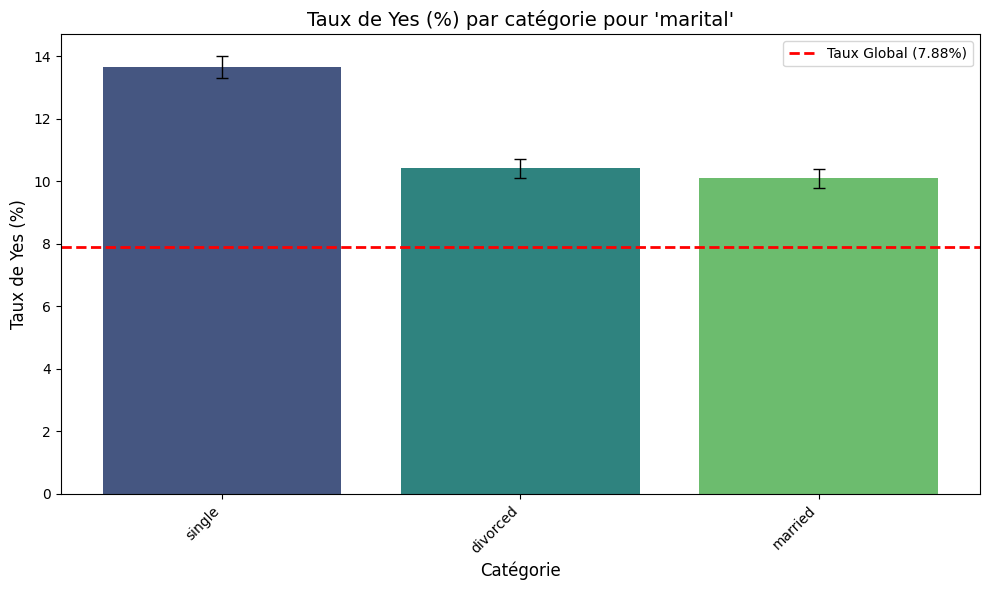

<ipython-input-9-4702253a1def>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


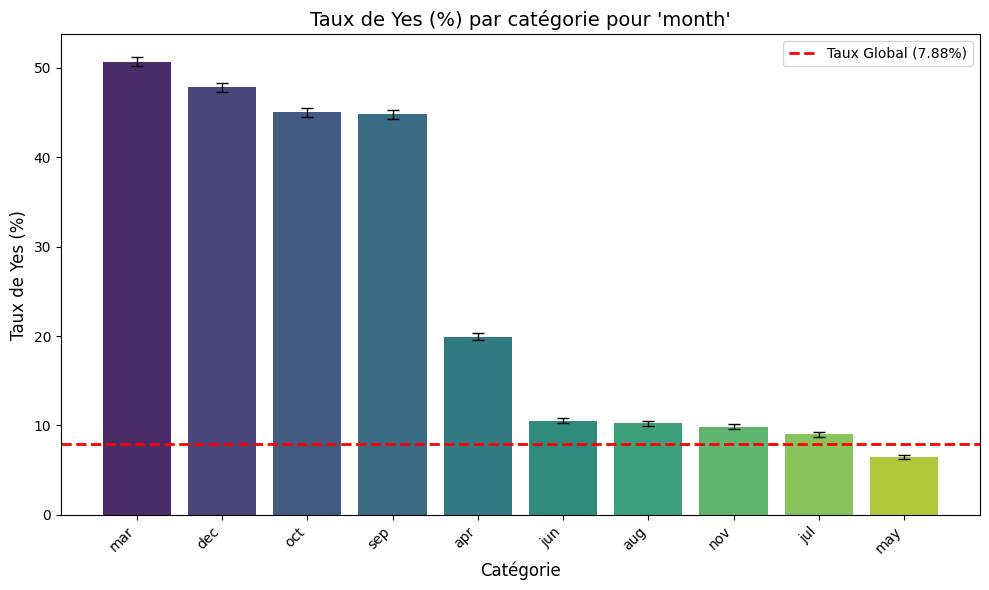

<ipython-input-9-4702253a1def>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


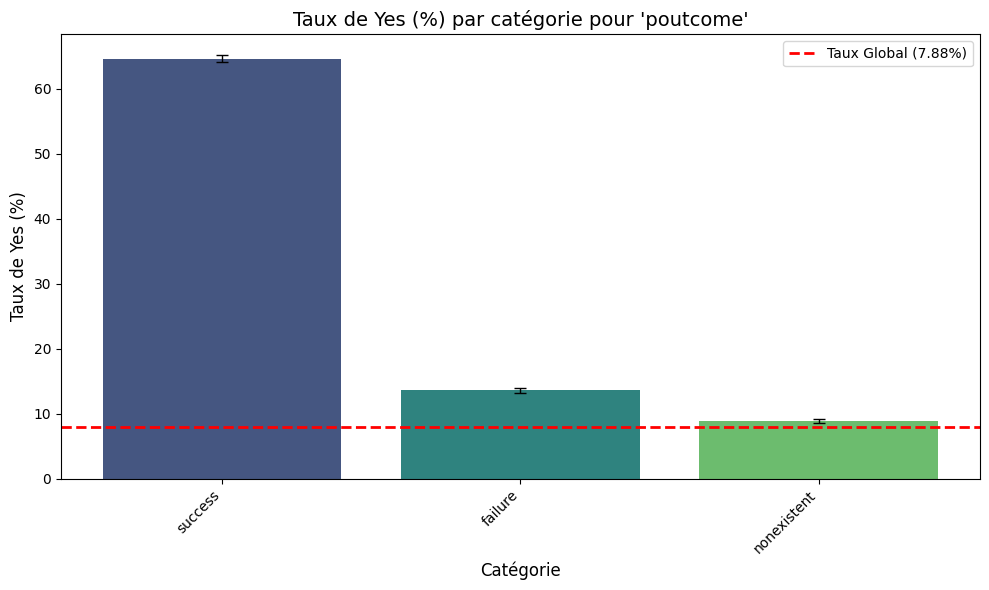

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Taux global de 7,88
global_rate = 7.88

# Création d'un histogramme pour chaque variable catégorique
for col in category_rates_df['Variable'].unique():
    # Filtrer les données pour la variable actuelle
    data = category_rates_df[category_rates_df['Variable'] == col]

    # Vérifie que les barres d'erreur sont bien définies et non nulles
    if data['Écart-Type'].isnull().all():
        print(f"Pas d'écart-type défini pour '{col}', le graphique ne sera pas tracé.")
        continue

    # Créer le graphique
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=data,
        x='Catégorie',
        y='Taux de Yes (%)',
        palette=sns.color_palette('viridis', n_colors=len(data)),
        errorbar=None  # Remplace le paramètre ci=None
    )

    # Ajouter les barres d'erreur manuellement
    plt.errorbar(
        x=range(len(data)),
        y=data['Taux de Yes (%)'],
        yerr=data['Écart-Type'],
        fmt='none',  # Pas de symbole pour les points
        ecolor='black',  # Couleur des barres d'erreur
        elinewidth=1,  # Épaisseur des barres d'erreur
        capsize=4  # Taille des terminaisons des barres
    )

    # Ajouter la ligne horizontale pour le taux global
    plt.axhline(global_rate, color='red', linestyle='--', linewidth=2, label=f'Taux Global ({global_rate}%)')

    # Ajouter des labels et un titre
    plt.title(f"Taux de Yes (%) par catégorie pour '{col}'", fontsize=14)
    plt.xlabel("Catégorie", fontsize=12)
    plt.ylabel("Taux de Yes (%)", fontsize=12)
    plt.xticks(ticks=range(len(data)), labels=data['Catégorie'], rotation=45, ha='right', fontsize=10)
    plt.legend(loc='upper right')
    plt.tight_layout()  # Ajuster les marges

    # Afficher le graphique
    plt.show()


## Les facteurs qui semblent le plus influencer le "oui"

**Les catégories socio-professionnelles qui utilisent le plus leur téléphone mobile**. Ce qui sélectionne probablement les actifs, les clients existants, et les personnes qui ne sont pas en défaut de paiement de prêts. Les classes les plus aisées de la société, ce qui est logique.  


**Le fait d'avoir été exposé à une campagne marketing précédente et d'avoir souscrit à un précédent produit**. C'est très connu en marketing, un client existant à 7 fois plus de chance d'acheter un nouveau produit. A l'exclusion du prêt immobilier principal : le produit étant très éloigné en termes de prix, ce n'est probablement pas un critère pertinent.

**BIAIS POSSIBLE : Les mois de mars, décembre, septembre et octobre** vérifier si ce sont les mois des précédentes campagnes de prospection si les campagnes sont intermittentes, ou si ces mois correspondent à des taux de prêts interbancaires favorables (euribor3m)

**BIAIS POSSIBLE : Le fait d'être étudiant ou retraité ou illétré**. Je pense que c'est une majoration dûe aux faibles effectif de ces catégories. On sait que les faibles effectifs ont tendance à majorer les incidence, et que lorsqu'on augmente les effectifs, le taux de conversion chute. De même que ce sont des catégories socio-professionnelles faciles à contacter, donc à exposer à un argumentaire commercial conséquent, qui est très efficace pour augmenter les conversions. Pour moi, ces catégories sont des data biaisantes. Il faudra regarder si elles impactent le modèle.




##ANOVA

In [ ]:
import pandas as pd
from scipy.stats import f_oneway

def perform_anova(df, target, categorical_columns):

    anova_results = {}

    for col in categorical_columns:
        # Grouper les données par catégorie pour la variable en cours
        groups = [df[df[col] == category][target] for category in df[col].unique()]

        # Calculer l'ANOVA
        f_stat, p_value = f_oneway(*groups)

        # Stocker les résultats
        anova_results[col] = {'f_stat': f_stat, 'p_value': p_value}

    # Transformer les résultats en DataFrame pour un affichage lisible
    anova_df = pd.DataFrame.from_dict(anova_results, orient='index')
    anova_df.index.name = "Variable"
    anova_df.reset_index(inplace=True)

    # Ajouter une colonne pour interpréter la significativité (p < 0.05)
    anova_df['Significant'] = anova_df['p_value'] < 0.05

    # Trier par ordre décroissant de f-stat
    anova_df = anova_df.sort_values(by='f_stat', ascending=False)

    return anova_df

anova_results_df = perform_anova(df, 'y_binary', ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week'])
print(anova_results_df)



      Variable      f_stat        p_value  Significant
6      contact  527.036195  9.918105e-116         True
7        month  239.542470   0.000000e+00         True
3      default  102.130961   6.035816e-45         True
0          job   43.207771   3.001967e-94         True
1      marital   32.692957   4.317636e-21         True
2    education   12.630813   2.756409e-16         True
8  day_of_week    3.606233   6.062515e-03         True
4      housing    3.050107   4.736708e-02         True
5         loan    1.126999   3.240164e-01        False


## Analyse de la variance

Contact semble être une caractéristique principale, la forme du contact serait donc importante.

Month semble être important aussi, et nous pouvons relier ceci à la périodicité des campagnes marketing si elles sont intermittentes, ou à la variation des taux d'intérêts à 3 mois. Il faudra regarder les correlations entre cette variable et euribor3m

default, job, marital, et education semblent être significatives, mais d'effet plus modéré.

Loan n'a pas d'impact et peut être exclue de l'analyse et du modèle.

# Test de Chi Deux

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

# Initialisation pour stocker les résultats
chi2_results = []

for col in categorical_columns:
    # Crée une table de contingence
    contingency_table = pd.crosstab(df[col], df['y'])

    # Test du chi-carré
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Enregistrer les résultats
    chi2_results.append({
        'Variable': col,
        'Chi2': chi2,
        'p-valeur': p,
        'Degré de liberté': dof,
        'Significatif': 'Oui' if p < 0.05 else 'Non'
    })

# Convertir les résultats en DataFrame
chi2_results_df = pd.DataFrame(chi2_results)

# Afficher les résultats triés par p-valeur
chi2_results_df = chi2_results_df.sort_values(by='p-valeur')
print("\nRésultats des tests Khi2 :")
print(chi2_results_df)

# Affichage des résultats significatifs
significant = chi2_results_df[chi2_results_df['Significatif'] == 'Oui']
if not significant.empty:
    print("\nVariables significatives (p < 0.05) :")
    print(significant)
else:
    print("\nAucune variable significativement liée à 'y'.")



Résultats des tests Khi2 :
      Variable         Chi2       p-valeur  Degré de liberté Significatif
7        month  2025.225750   0.000000e+00                 9          Oui
6      contact   517.963755  1.173696e-114                 1          Oui
0          job   468.756464   1.462113e-93                11          Oui
3      default   203.033407   8.163114e-45                 2          Oui
1      marital    97.802244   4.613190e-21                 3          Oui
2    education    88.202451   2.893202e-16                 7          Oui
8  day_of_week    14.420847   6.066223e-03                 4          Oui
4      housing     6.099646   4.736730e-02                 2          Oui
5         loan     2.254049   3.239959e-01                 2          Non
9     poutcome     0.000000   1.000000e+00                 0          Non

Variables significatives (p < 0.05) :
      Variable         Chi2       p-valeur  Degré de liberté Significatif
7        month  2025.225750   0.000000e+00   

## Seuls le prêt personnel et le résultat de la campagne marketing précédent semblent n'avoir aucun lien avec l'achat d'un compte à termes.

Je garde donc la majorité des données pour la création du modèle prédictif, pour confirmation.

##Il faut confirmer ces suppositions par le modèle prédictif. Je prépare donc les données

In [ ]:
# One-hot encoding sur les colonnes catégorielles (par exemple, 'job', 'marital', etc.)
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Réaliser un one-hot encoding sur les colonnes catégoriques
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Vérification du DataFrame final
print(df_encoded.head())


   age  campaign  previous  emp.var.rate  cons.price.idx  cons.conf.idx  \
0   56         1         0           1.1          93.994          -36.4   
1   57         1         0           1.1          93.994          -36.4   
2   37         1         0           1.1          93.994          -36.4   
3   40         1         0           1.1          93.994          -36.4   
4   56         1         0           1.1          93.994          -36.4   

   euribor3m  nr.employed   y  y_binary  ...  month_jun  month_mar  month_may  \
0      4.857       5191.0  no         0  ...      False      False       True   
1      4.857       5191.0  no         0  ...      False      False       True   
2      4.857       5191.0  no         0  ...      False      False       True   
3      4.857       5191.0  no         0  ...      False      False       True   
4      4.857       5191.0  no         0  ...      False      False       True   

   month_nov  month_oct  month_sep  day_of_week_mon  day_of_we

Matrice de confusion :
[[5622    0]
 [   0  566]]

Rapport de classification :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5622
           1       1.00      1.00      1.00       566

    accuracy                           1.00      6188
   macro avg       1.00      1.00      1.00      6188
weighted avg       1.00      1.00      1.00      6188


ROC-AUC : 1.00


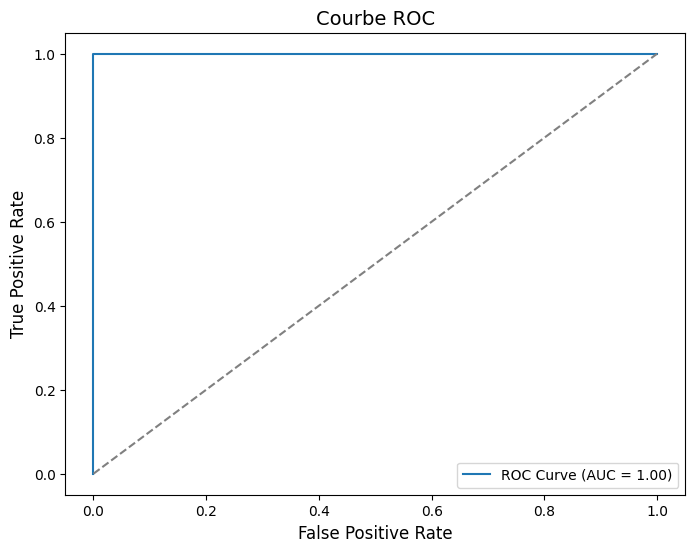

In [ ]:
# Importer les bibliothèques nécessaires
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 1. Préparation des données
# Séparer X (variables explicatives) et y (cible)
X = df.drop(columns=['y_binary'])  # Remplacer 'y_binary' par le nom exact de ta colonne cible
y = df['y_binary']

# One-hot encoding pour les variables catégorielles
X = pd.get_dummies(X, drop_first=True)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 2. Construire et entraîner le modèle
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# 3. Évaluer le modèle
# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilités pour la classe 'yes'

# Matrice de confusion
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))

# Rapport de classification (précision, rappel, F1-score)
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

# Calcul du score ROC-AUC
roc_auc = roc_auc_score(y_test, y_proba)
print(f"\nROC-AUC : {roc_auc:.2f}")

# 4. Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonale aléatoire
plt.title("Courbe ROC", fontsize=14)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend()
plt.show()


In [ ]:
print("Distribution des classes dans y_train :")
print(y_train.value_counts(normalize=True))

print("\nDistribution des classes dans y_test :")
print(y_test.value_counts(normalize=True))

Distribution des classes dans y_train :
y_binary
0    0.908562
1    0.091438
Name: proportion, dtype: float64

Distribution des classes dans y_test :
y_binary
0    0.908533
1    0.091467
Name: proportion, dtype: float64


La sur-représentation du 'non' impacte le modèle. Il faut donc re-équilibrer les classes

In [ ]:
from imblearn.over_sampling import SMOTE

# Rééquilibrer les données avec SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Vérifier les nouvelles proportions
print("Distribution des classes après rééquilibrage :")
print(y_resampled.value_counts(normalize=True))


Distribution des classes après rééquilibrage :
y_binary
0    0.5
1    0.5
Name: proportion, dtype: float64


In [ ]:

X_resampled = X_resampled.drop(columns=['duration'], errors='ignore')
X_test = X_test.drop(columns=['duration'], errors='ignore')


# Réentraîner le modèle avec les données rééquilibrées
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_resampled, y_resampled)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Matrice de confusion
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))

# Rapport de classification
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

# Score ROC-AUC
roc_auc = roc_auc_score(y_test, y_proba)
print(f"\nROC-AUC : {roc_auc:.2f}")


Matrice de confusion :
[[5622    0]
 [   0  566]]

Rapport de classification :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5622
           1       1.00      1.00      1.00       566

    accuracy                           1.00      6188
   macro avg       1.00      1.00      1.00      6188
weighted avg       1.00      1.00      1.00      6188


ROC-AUC : 1.00


In [ ]:
# Vérifier les données rééquilibrées
print("Échantillons rééquilibrés (taille et structure) :")
print(X_resampled.head())


Échantillons rééquilibrés (taille et structure) :
   age  campaign  previous  emp.var.rate  cons.price.idx  cons.conf.idx  \
0   36         2         0          -1.1          94.767          -50.8   
1   33         1         0          -1.8          92.893          -46.2   
2   34         1         0           1.4          93.444          -36.1   
3   32         3         0           1.1          93.994          -36.4   
4   29         2         0          -1.8          92.893          -46.2   

   euribor3m  nr.employed  job_blue-collar  job_entrepreneur  ...  month_mar  \
0      1.028       4963.6            False             False  ...      False   
1      1.344       5099.1            False             False  ...      False   
2      4.966       5228.1            False             False  ...      False   
3      4.857       5191.0            False             False  ...      False   
4      1.266       5099.1            False             False  ...      False   

   month_may  mont

In [ ]:
# Supprimer la colonne cible 'y_yes' des variables explicatives
if 'y_yes' in X_resampled.columns:
    X_resampled = X_resampled.drop(columns=['y_yes'])
if 'y_yes' in X_test.columns:
    X_test = X_test.drop(columns=['y_yes'])

# Vérifier les colonnes après la suppression
print("Colonnes utilisées pour l'entraînement après correction :")
print(X_resampled.columns)

# Réentraîner le modèle
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_resampled, y_resampled)

# Évaluer le modèle sur l'ensemble de test
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Afficher les résultats
print("\nMatrice de confusion :")
print(confusion_matrix(y_test, y_pred))

print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print(f"\nROC-AUC : {roc_auc:.2f}")


Colonnes utilisées pour l'entraînement après correction :
Index(['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_married', 'marital_single',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'default_unknown', 'default_yes',
       'housing_yes', 'loan_yes', 'contact_telephone', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed'],
      dtype='object')

Matrice de confusion :
[[4888  734]
 [ 357  209]]

Rapport de classification :

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Ajuster le seuil de probabilité
threshold = 0.3  # Exemple de seuil
y_pred_adjusted = (y_proba >= threshold).astype(int)

# Nouvelle évaluation avec le seuil ajusté
print("Matrice de confusion (seuil ajusté) :")
print(confusion_matrix(y_test, y_pred_adjusted))

print("\nRapport de classification (seuil ajusté) :")
print(classification_report(y_test, y_pred_adjusted))


Matrice de confusion (seuil ajusté) :
[[3995 1627]
 [ 260  306]]

Rapport de classification (seuil ajusté) :
              precision    recall  f1-score   support

           0       0.94      0.71      0.81      5622
           1       0.16      0.54      0.24       566

    accuracy                           0.70      6188
   macro avg       0.55      0.63      0.53      6188
weighted avg       0.87      0.70      0.76      6188



In [ ]:
# Tester différents seuils
for threshold in [0.2, 0.25, 0.35, 0.4]:
    y_pred_adjusted = (y_proba >= threshold).astype(int)
    print(f"\nSeuil : {threshold}")
    print(confusion_matrix(y_test, y_pred_adjusted))
    print(classification_report(y_test, y_pred_adjusted))



Seuil : 0.2
[[3147 2475]
 [ 193  373]]
              precision    recall  f1-score   support

           0       0.94      0.56      0.70      5622
           1       0.13      0.66      0.22       566

    accuracy                           0.57      6188
   macro avg       0.54      0.61      0.46      6188
weighted avg       0.87      0.57      0.66      6188


Seuil : 0.25
[[3606 2016]
 [ 229  337]]
              precision    recall  f1-score   support

           0       0.94      0.64      0.76      5622
           1       0.14      0.60      0.23       566

    accuracy                           0.64      6188
   macro avg       0.54      0.62      0.50      6188
weighted avg       0.87      0.64      0.71      6188


Seuil : 0.35
[[4286 1336]
 [ 277  289]]
              precision    recall  f1-score   support

           0       0.94      0.76      0.84      5622
           1       0.18      0.51      0.26       566

    accuracy                           0.74      6188
   mac

Top 10 des variables influentes (Régression logistique) :
                          Feature  Coefficient  Absolute_Coefficient
25    education_university.degree     3.581522              3.581522
22          education_high.school     3.065962              3.065962
24  education_professional.course     2.701178              2.701178
12                    job_retired     2.381805              2.381805
21             education_basic.9y     2.241636              2.241636
43                day_of_week_wed     2.207358              2.207358
20             education_basic.6y     2.076509              2.076509
41                day_of_week_thu     2.049256              2.049256
19                 marital_single     2.031345              2.031345
42                day_of_week_tue     2.012073              2.012073


<Figure size 1000x600 with 0 Axes>

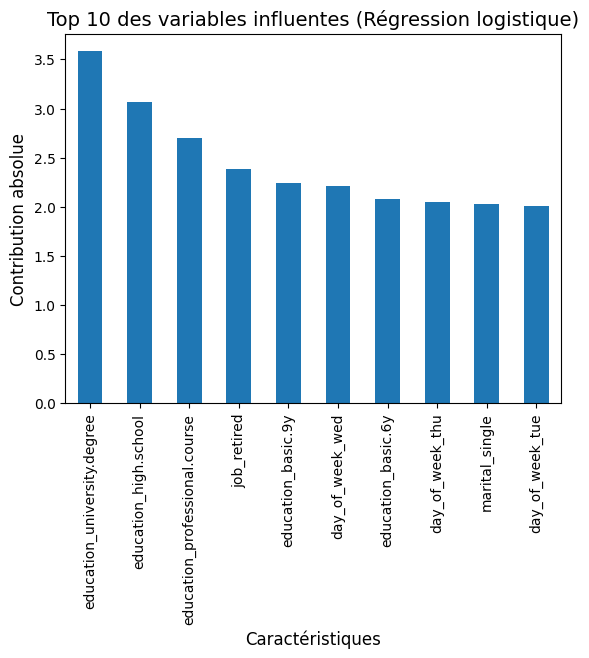

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Extraire les coefficients du modèle
coefficients = model.coef_[0]  # Coefficients pour chaque variable
features = X_resampled.columns  # Noms des variables

# Créer un DataFrame pour organiser les résultats
logistic_importance_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

# Calculer la contribution absolue pour trier les variables
logistic_importance_df['Absolute_Coefficient'] = np.abs(logistic_importance_df['Coefficient'])
logistic_importance_df = logistic_importance_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Afficher les 10 variables les plus influentes
print("Top 10 des variables influentes (Régression logistique) :")
print(logistic_importance_df.head(10))

# Visualiser les résultats
plt.figure(figsize=(10, 6))
logistic_importance_df.head(10).plot.bar(x='Feature', y='Absolute_Coefficient', legend=False)
plt.title("Top 10 des variables influentes (Régression logistique)", fontsize=14)
plt.ylabel("Contribution absolue", fontsize=12)
plt.xlabel("Caractéristiques", fontsize=12)
plt.show()


# ANALYSE DES VARIABLES PERTINENTES DONNEES PAR LA REGRESSION

**Niveau d'éducation**

**Jour de la semaine** : mercredi

**Statut marital**

Je décide de tester les autres types de modélisation, la regression ne semblant pas être la plus fiable au vue du déséquilibre des données

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Modèle Random Forest
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')  # Class_weight pour prendre en compte le déséquilibre
rf_model.fit(X_resampled, y_resampled)

# Prédictions
y_pred_rf = rf_model.predict(X_test)

# Évaluation
print("Matrice de confusion (Random Forest) :")
print(confusion_matrix(y_test, y_pred_rf))
print("\nRapport de classification (Random Forest) :")
print(classification_report(y_test, y_pred_rf))


Matrice de confusion (Random Forest) :
[[5321  301]
 [ 416  150]]

Rapport de classification (Random Forest) :
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      5622
           1       0.33      0.27      0.29       566

    accuracy                           0.88      6188
   macro avg       0.63      0.61      0.62      6188
weighted avg       0.87      0.88      0.88      6188



#Analyse des résultats du Random Forest

**Matrice de confusion** :

Classe 0 (majoritaire) :
Vrais négatifs (5321) : La majorité des clients "no" sont correctement classifiés.

Faux positifs (301) : Quelques clients "no" sont mal classifiés comme "yes".

Classe 1 (minoritaire) :
Vrais positifs (150) : Peu de clients "yes" sont correctement prédits.
Faux négatifs (416) : La majorité des clients "yes" sont mal classifiés comme "no".

**Rapport de classification** :

Classe 0 :
Très bonne précision (93%) et rappel (95%).
Le modèle excelle sur la classe majoritaire.

Classe 1 :
Précision : 33%, meilleure que la régression logistique.

Rappel : 27%, légèrement inférieur à celui obtenu avec un seuil ajusté dans la régression logistique. le modèle peine à identifier les clients intéressés.

Cela est dû en partie au déséquilibre des classes, qui reste un défi malgré le rééquilibrage lors de l’entraînement.

#On a trop de réponses 'non' pour avoir un modèle prédictif correct que ce soit en régression ou en arbre de décision.

Globalement :

**Accuracy (88%)** : Le modèle est globalement performant, mais cela est principalement dû à la bonne performance sur la classe 0.

**Macro avg** :
Indique un équilibre modéré entre les deux classes, mais la performance pour la classe 1 reste limitée.

Top 10 des variables influentes (Random Forest) :
                        Feature  Importance
6                     euribor3m    0.168180
0                           age    0.119188
1                      campaign    0.050856
7                   nr.employed    0.043669
4                cons.price.idx    0.039694
25  education_university.degree    0.037362
3                  emp.var.rate    0.034996
5                 cons.conf.idx    0.033445
22        education_high.school    0.032240
43              day_of_week_wed    0.027554


<Figure size 1000x600 with 0 Axes>

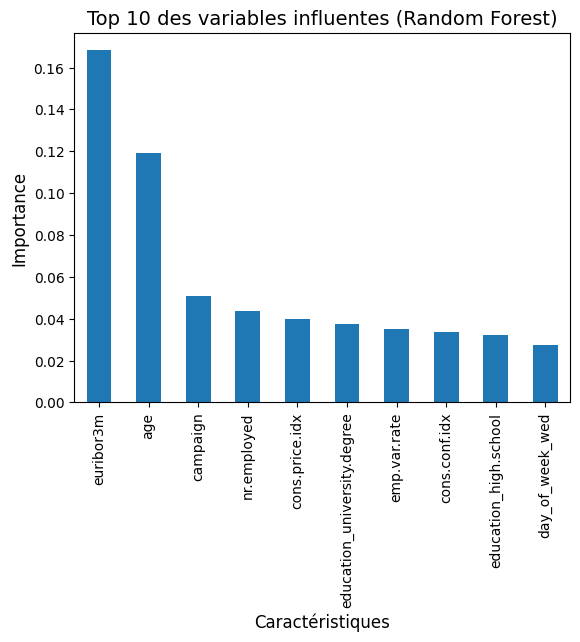

In [ ]:
# Extraire les importances des variables
rf_importances = rf_model.feature_importances_
features = X_resampled.columns

# Créer un DataFrame pour organiser les résultats
rf_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': rf_importances
}).sort_values(by='Importance', ascending=False)

# Afficher les 10 variables les plus influentes
print("Top 10 des variables influentes (Random Forest) :")
print(rf_importance_df.head(10))

# Visualiser les résultats
plt.figure(figsize=(10, 6))
rf_importance_df.head(10).plot.bar(x='Feature', y='Importance', legend=False)
plt.title("Top 10 des variables influentes (Random Forest)", fontsize=14)
plt.ylabel("Importance", fontsize=12)
plt.xlabel("Caractéristiques", fontsize=12)
plt.show()


#Top des données à récolter pour optimiser les campagnes (RandomForest)

**DONNEES STRUCTURELLES**
Les taux de crédits interbancaires à 3 mois

Le taux d'emploi

L'index des prix

**DONNEES PERSONNELLES**

Age

Niveau d'éducation

#Les campagnes pourraient apporter plus de résultat si elles sont menées le mercredi




In [ ]:
from xgboost import XGBClassifier

# Modèle XGBoost
xgb_model = XGBClassifier(random_state=42, scale_pos_weight=(len(y_resampled) - sum(y_resampled)) / sum(y_resampled))
xgb_model.fit(X_resampled, y_resampled)

# Prédictions
y_pred_xgb = xgb_model.predict(X_test)

# Évaluation
print("Matrice de confusion (XGBoost) :")
print(confusion_matrix(y_test, y_pred_xgb))
print("\nRapport de classification (XGBoost) :")
print(classification_report(y_test, y_pred_xgb))


Matrice de confusion (XGBoost) :
[[5333  289]
 [ 417  149]]

Rapport de classification (XGBoost) :
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      5622
           1       0.34      0.26      0.30       566

    accuracy                           0.89      6188
   macro avg       0.63      0.61      0.62      6188
weighted avg       0.87      0.89      0.88      6188



In [ ]:
from xgboost import XGBClassifier

# Ajuster manuellement les hyperparamètres
xgb_model = XGBClassifier(
    random_state=42,
    max_depth=5,
    learning_rate=0.1,
    n_estimators=200,
    scale_pos_weight=10  # Ajusté pour équilibrer les classes
)

# Entraîner le modèle
xgb_model.fit(X_resampled, y_resampled)

# Prédictions
y_pred_xgb = xgb_model.predict(X_test)

# Évaluation
print("Matrice de confusion (XGBoost ajusté manuellement) :")
print(confusion_matrix(y_test, y_pred_xgb))
print("\nRapport de classification (XGBoost ajusté manuellement) :")
print(classification_report(y_test, y_pred_xgb))



Matrice de confusion (XGBoost ajusté manuellement) :
[[2828 2794]
 [ 138  428]]

Rapport de classification (XGBoost ajusté manuellement) :
              precision    recall  f1-score   support

           0       0.95      0.50      0.66      5622
           1       0.13      0.76      0.23       566

    accuracy                           0.53      6188
   macro avg       0.54      0.63      0.44      6188
weighted avg       0.88      0.53      0.62      6188



#Analyse du modèle XGBoost (ajusté manuellement)

**Matrice de confusion :**

Classe 0 (majoritaire) :

Vrais négatifs (2828) : Beaucoup moins de clients "no" correctement classifiés.

Faux positifs (2794) : Un grand nombre de clients "no" mal classifiés comme "yes".

Classe 1 (minoritaire) :

Vrais positifs (428) : Une nette amélioration par rapport aux précédents modèles.

Faux négatifs (138) : Beaucoup moins d'erreurs pour la classe 1.
Rapport de classification :

Classe 0 :

Précision : 95%, reste élevée pour les vrais négatifs, mais de nombreux faux positifs biaisent les résultats.

Rappel : 50%, une baisse significative due à l'augmentation des faux positifs.

Classe 1 :

Précision : 13%, très faible car de nombreux faux positifs réduisent la confiance dans les prédictions "yes".

Rappel : 76%, une nette amélioration, indiquant que le modèle identifie beaucoup plus de clients "yes".

**Globalement :**

Accuracy (53%) : Très faible car la majorité des prédictions sont incorrectes pour la classe majoritaire.

** Macro avg :**
Le rappel est modérément bon (63%), mais le F1-score global est faible.

Top 10 des variables influentes :
                          Feature  Importance
3                    emp.var.rate    0.140741
7                     nr.employed    0.081930
18                marital_married    0.056101
24  education_professional.course    0.042350
19                 marital_single    0.040233
22          education_high.school    0.035765
28                    housing_yes    0.032128
43                day_of_week_wed    0.031377
25    education_university.degree    0.031223
21             education_basic.9y    0.031194


<Figure size 1000x600 with 0 Axes>

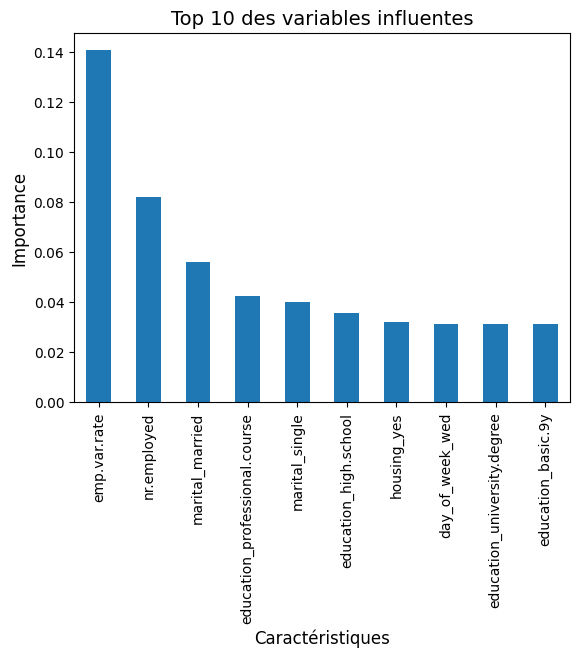

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Extraire l'importance des caractéristiques du modèle XGBoost
feature_importances = xgb_model.feature_importances_

# Associer les scores aux noms des colonnes
feature_importance_df = pd.DataFrame({
    'Feature': X_resampled.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Afficher les 10 caractéristiques les plus importantes
print("Top 10 des variables influentes :")
print(feature_importance_df.head(10))

# Visualiser les importances
plt.figure(figsize=(10, 6))
feature_importance_df.head(10).plot.bar(x='Feature', y='Importance', legend=False)
plt.title("Top 10 des variables influentes", fontsize=14)
plt.ylabel("Importance", fontsize=12)
plt.xlabel("Caractéristiques", fontsize=12)
plt.show()


#Données à récolter conseillées par le modèle XGBoost :

**Données structurelles :**

Taux interbancaires à 3 mois (emp.var.rate) : Les campagnes doivent être alignées sur des périodes de stabilité ou de baisse des taux.

Taux d’emploi (nr.employed) : Un contexte de forte activité économique encourage les ventes.

**Données personnelles :**

Statut marital : Personnaliser les campagnes en fonction du statut marital des clients (célibataires et mariés sont les plus réactifs).
Niveau d’éducation : Cibler les clients ayant suivi des cours professionnels ou ayant un diplôme universitaire.
Temporalité :

Concentrer les campagnes sur les mercredis, qui sont les jours les plus performants.

#CONCLUSION GLOBALE ET DONNEES A RECOLTER POUR LE MODELE PREDICTIF

Au vu du déséquilibre des données, et de l'énorme majorité de "non" obtenu sur la campagne, il est difficile d'avoir des modèles prédictifs fiables pour l'optimisation de la vente de comptes à termes dans cette banque Portugaise.

Nous allons nous baser sur les données convergentes des trois modèles pour créer un modèle prédictif. Voici les données à récolter:

**Données structurelles**

  -  En priorité, il faut effectuer les campagnes lors des périodes où les taux de prêts interbancaires sont bas

  -  Les campagnes pourraient donner de meilleurs résultats si elles sont menées le mercredi

**Profil des contact**

   - Les haut niveaux d'instructions seraient une cible privilégiée

   - Ainsi que les personnes mariées.

# Modèle prédictif à développer : Nous pouvons récolter le statut d'éducation et le statut marital du contact, et simplement mettre des recommandations lors de l'utilisation du modèle, sous la forme d'un message : "les taux interbancaires à trois mois bas ainsi que les prospections effectuées le mercredi sont des facteurs favorables".
